In [1]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine, text

In [2]:
from scipy import stats
import quantstats as qs


### load data from DB

In [9]:
host = '192.168.1.27'
port = '3306'
db_name = 'quantdb_maria'
username = 'quantdb'
password = 'QuantDb2023!'

engine = create_engine("mysql+pymysql://" + username + ":" + password + "@" + host + ":" + port + "/" + db_name)
conn=engine.connect()

In [10]:
trading_dates=f"select unique(Dates) from SSC_table_Bak"
dates=pd.read_sql(trading_dates, conn)

In [11]:
period1='2015-01-01'
period2='2023-11-29'

In [12]:
query_COM=f"select * from COM_table_Bak where (Dates>='{period1}' and Dates<='{period2}')"
data_COM=pd.read_sql(query_COM, conn)

In [13]:
len(data_COM), len(data_COM[data_COM['KOSPI200YN']=='Y'])

(2634402, 440376)

### combine tables

In [6]:
query_CIA=f"select * from CIA_Table where Dates>='{period1}' and Dates<='{period2}'"
data_CIA=pd.read_sql(query_CIA, conn)

query_SSC=f"select * from SSC_table_Bak where Dates>='{period1}' and Dates<='{period2}'"
data_SSC=pd.read_sql(query_SSC, conn)

query_NFS=f"select * from NFS_IFRS_Table where Dates>='{period1}' and Dates<='{period2}'"
data_NFS=pd.read_sql(query_NFS, conn)

query_NFCF=f"select * from NFCF_IFRS_Table where Dates>='{period1}' and Dates<='{period2}'"
data_NFCF=pd.read_sql(query_NFCF, conn)

query_NFR=f"select * from NFR_IFRS_Table where Dates>='{period1}' and Dates<='{period2}'"
data_NFR=pd.read_sql(query_NFR, conn)

query_NVAL=f"select * from NVAL_IFRS_Table where Dates>='{period1}' and Dates<='{period2}'"
data_NVAL=pd.read_sql(query_NVAL, conn)

query_FS=f"select * from FS1_Table where Dates>='{period1}' and Dates<='{period2}'"
data_FS=pd.read_sql(query_FS, conn)

query_CON=f"select * from CON_Table where Dates>='{period1}' and Dates<='{period2}'"
data_CON=pd.read_sql(query_CON, conn)               

In [14]:
query_catalog=f"select * from Catalog_Table"
data_catalog=pd.read_sql(query_catalog, conn)

In [15]:
data_catalog

,Table_Name,Frequency,Dates,Item_Code,Item_Name_kor,Item_Name_eng,DB_col_name
0,COM,Annual,2017-03-24 00:00:00,CP30900010,시장 대표 업종(Hist.),Koscom Industry(Hist.),KC_Industry
1,COM,Annual,2017-03-24 00:00:00,CP10007100,FnGuide Industry Group 27,FnGuide Industry Group 27,FG_IndustryGroup27
2,COM,Annual,2017-03-24 00:00:00,CP10000650,FnGuide Sector (지수 편입 기준),FnGuide Sector (Index),FG_Sector_Idx
3,COM,Annual,2017-03-24 00:00:00,CP10000850,FnGuide Industry Group (지수 편입 기준),FnGuide Industry Group (Index),FG_IndustryGroup_Idx
4,COM,Annual,2017-03-24 00:00:00,CP10001050,FnGuide Industry (지수 편입 기준),FnGuide Industry (Index),FG_Industry_Idx
...,...,...,...,...,...,...,...
249,FS1,3,2023,1000910000,자산총계(천원),None,Assets_3LQ_fs1
250,FS1,6,2023,1000930000,자본총계(천원),None,TA_TQ_fs1
251,FS1,9,2023,1000930000,자본총계(천원),None,TA_LQ_fs1
252,FS1,12,2023,1000930000,자본총계(천원),None,TA_2LQ_fs1


In [16]:
query_idx=f"select * from krx_idx"
krx_idx=pd.read_sql(query_idx, conn)

In [17]:
krx_idx.set_index(krx_idx.columns[0], inplace=True)

In [18]:
krx_idx

,코스피,코스피 200,코스피 100,코스피 50,코스닥 150,코스닥,코스피 200 동일가중,코스피 대형주,코스피 중형주,코스피 소형주,...,은행(KOSPI),보험(KOSPI),증권(KOSPI),기타금융(KOSPI),소프트웨어(KOSPI),하드웨어(KOSPI),반도체(KOSPI),디스플레이(KOSPI),통신서비스(KOSPI),유틸리티(KOSPI)
Dates,,,,,,,,,,,,,,,,,,,,,
2000-01-04,1059.04,133.66,NaN,NaN,NaN,2660.00,NaN,1000.00,1000.00,1000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,986.31,123.86,922.14,918.40,NaN,2629.50,NaN,923.61,970.47,992.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,960.79,120.80,900.82,898.72,NaN,2475.20,NaN,904.64,931.49,962.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,948.65,119.10,887.78,883.90,NaN,2276.60,NaN,890.32,938.66,966.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,987.24,124.11,927.12,924.83,NaN,2310.80,NaN,928.70,952.01,975.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-23,2514.96,336.91,2541.13,2330.06,1286.62,815.98,2100.50,2505.06,2728.44,2260.26,...,2513.78,10621.1,2271.66,47.08,3411.92,3222.50,23787.2,217.39,716.41,859.90
2023-11-24,2496.63,334.00,2516.45,2307.98,1277.18,815.00,2095.36,2479.92,2742.50,2266.64,...,2493.43,10596.0,2247.17,46.83,3428.56,3177.68,23538.2,209.89,712.79,862.80
2023-11-27,2495.66,333.67,2513.19,2303.92,1271.49,810.25,2101.75,2475.23,2746.83,2262.04,...,2475.69,10661.1,2265.16,47.05,3452.75,3138.45,23529.8,211.56,718.10,871.43


In [15]:
# pd.DatetimeIndex(com_data['Dates'].unique()).get_loc('2010-01-26')

### factor generating dates

In [ ]:
# rebal_dates = []
# # Initialize a variable to keep track of the last month encountered
# last_month = None

# # Loop through the DataFrame rows and find the last date before month changes
# for row_idx, row in enumerate(given_dates):

#     current_month = row.month
#     if (current_month != last_month) and row_idx >0:
#         rebal_dates.append(given_dates[row_idx - 1])
#     last_month = current_month

# # Convert the list of last dates to a DataFrame
# rebal_dates_df = pd.DataFrame({'rebalancing_dates': rebal_dates})

# print(rebal_dates_df)

In [ ]:
# # Group the data by bi-weekly intervals and select the last date of each interval
# def bi_weekly_end_date(group):
#     return group.iloc[-1]

# bi_weekly_end_dates=given_dates.to_frame().groupby(pd.Grouper(key=0, freq='2W')).apply(bi_weekly_end_date)
# weekly_end_dates=given_dates.to_frame().groupby(pd.Grouper(key=0, freq='1W')).last()

### preprocessing DB data

In [17]:
data_COM.shape, data_CIA.shape, data_SSC.shape, data_IFRS.shape, data_CON.shape

((2634402, 15), (2628412, 19), (2634402, 35), (2628412, 66), (2626717, 67))

In [19]:
data_COM.set_index(['Dates', 'Symbol'], inplace=True)
data_SSC.set_index(['Dates', 'Symbol'], inplace=True)
data_CIA.set_index(['Dates', 'Symbol'], inplace=True)
data_CON.set_index(['Dates', 'Symbol'], inplace=True)

data_NFS.set_index(['Dates', 'Symbol'], inplace=True)
data_NFCF.set_index(['Dates', 'Symbol'], inplace=True)
data_NFR.set_index(['Dates', 'Symbol'], inplace=True)
data_NVAL.set_index(['Dates', 'Symbol'], inplace=True)
data_FS.set_index(['Dates', 'Symbol'], inplace=True)

In [20]:
data_COM_nodup=data_COM.loc[~data_COM.index.duplicated(keep='first')].copy()
data_SSC_nodup=data_SSC.loc[~data_SSC.index.duplicated(keep='first')].copy()
data_CIA_nodup=data_CIA.loc[~data_CIA.index.duplicated(keep='first')].copy()
data_CON_nodup=data_CON.loc[~data_CON.index.duplicated(keep='first')].copy()


data_NFS_nodup=data_NFS.loc[~data_NFS.index.duplicated(keep='first')].copy()
data_NFCF_nodup=data_NFCF.loc[~data_NFCF.index.duplicated(keep='first')].copy()
data_NFR_nodup=data_NFR.loc[~data_NFR.index.duplicated(keep='first')].copy()
data_NVAL_nodup=data_NVAL.loc[~data_NVAL.index.duplicated(keep='first')].copy()
data_FS_nodup=data_FS.loc[~data_FS.index.duplicated(keep='first')].copy()


In [23]:
data_SSC_nodup['TradeStop'][data_SSC_nodup['TradeStop']=='정상']=0
data_SSC_nodup['TradeStop'][data_SSC_nodup['TradeStop']=='거래정지']=1

In [24]:
data_SSC_nodup[data_SSC_nodup.columns[2:]]=data_SSC_nodup[data_SSC_nodup.columns[2:]].astype(float)
data_CIA_nodup[data_CIA_nodup.columns[2:]]=data_CIA_nodup[data_CIA_nodup.columns[2:]].astype(float)

In [25]:
data_NFS_nodup.loc[data_NFS_nodup['LE_TQ']=='완전잠식']=-99999
data_NFS_nodup.loc[data_NFS_nodup['LE_LQ']=='완전잠식']=-99999
data_NFS_nodup.loc[data_NFS_nodup['LE_2LQ']=='완전잠식']=-99999
data_NFS_nodup.loc[data_NFS_nodup['LE_3LQ']=='완전잠식']=-99999

In [26]:
data_NFS_nodup[data_NFS_nodup.columns[2:]]=data_NFS_nodup[data_NFS_nodup.columns[2:]].astype(float)

In [ ]:
data_CON[data_CON=='적지'].dropna(axis=0, how='all')

In [27]:
data_CON_nodup=data_CON_nodup.mask(data_CON_nodup=='N/A', other=None)
data_CON_nodup.loc[data_CON_nodup['BPSG_E3']=='적전']=-999
data_CON_nodup.loc[data_CON_nodup['BPSG_E3']=='적지']=-999
data_CON_nodup.loc[data_CON_nodup['BPSG_E3']=='흑전']=999

data_CON_nodup[data_CON_nodup.columns[2:]]=data_CON_nodup[data_CON_nodup.columns[2:]].astype(float)

In [31]:
data_NFCF_nodup[data_NFCF_nodup.columns[2:]]=data_NFCF_nodup[data_NFCF_nodup.columns[2:]].astype(float)

In [41]:
data_NFR_nodup[data_NFR_nodup=='N/A(IFRS)']=None
data_NFR_nodup[data_NFR_nodup=='완전잠식']=-99999

In [43]:
data_NFR_nodup[data_NFR_nodup.columns[2:]]=data_NFR_nodup[data_NFR_nodup.columns[2:]].astype(float)

In [45]:
data_NVAL_nodup[data_NVAL_nodup=='N/A']=None

In [69]:
data_NVAL_nodup[data_NVAL_nodup.columns[1:]]=data_NVAL_nodup[data_NVAL_nodup.columns[1:]].astype(float)

In [49]:
data_FS_nodup=data_FS_nodup[data_FS_nodup.columns[2:]].astype(float)

In [60]:
data_NVAL_nodup.index

MultiIndex([('2015-01-02', 'A000010'),
            ('2015-01-02', 'A000020'),
            ('2015-01-02', 'A000030'),
            ('2015-01-02', 'A000040'),
            ('2015-01-02', 'A000050'),
            ('2015-01-02', 'A000060'),
            ('2015-01-02', 'A000070'),
            ('2015-01-02', 'A000080'),
            ('2015-01-02', 'A000090'),
            ('2015-01-02', 'A000100'),
            ...
            ('2023-11-29', 'A453340'),
            ('2023-11-29', 'A456040'),
            ('2023-11-29', 'A457190'),
            ('2023-11-29', 'A900030'),
            ('2023-11-29', 'A900050'),
            ('2023-11-29', 'A900140'),
            ('2023-11-29', 'A950010'),
            ('2023-11-29', 'A950070'),
            ('2023-11-29', 'A950100'),
            ('2023-11-29', 'A950210')],
           names=['Dates', 'Symbol'], length=2628412)

# GURU EDA

In [76]:
import matplotlib.pyplot as plt

In [164]:
sample_date='2023-11-29'

## PER
### John Neff : 40% above mean and 60% under mean

In [63]:
data_NVAL_nodup.groupby(level='Dates').mean()['PER']

<ipython-input-63-cc00fce405b6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_NVAL_nodup.groupby(level='Dates').mean()['PER']


Dates
2015-01-02    36.242897
2015-01-05    36.242897
2015-01-06    36.242897
2015-01-07    36.242897
2015-01-08    36.242897
                ...    
2023-11-23    38.125057
2023-11-24    38.125057
2023-11-27    38.125057
2023-11-28    38.125057
2023-11-29    38.125057
Name: PER, Length: 2194, dtype: float64

In [82]:
data_NVAL_nodup.loc[data_NVAL_nodup.index.get_level_values(0)==sample_date, 'PER'].describe()

count     613.000000
mean       38.125057
std       198.154657
min         0.950000
25%         7.150000
50%        12.690000
75%        25.090000
max      4413.010000
Name: PER, dtype: float64

In [85]:
temp_per=data_NVAL_nodup.loc[data_NVAL_nodup.index.get_level_values(0)==sample_date, 'PER']

In [87]:
temp_per[temp_per>1000]

Dates       Symbol 
2023-11-29  A001560    4413.01
            A009420    1701.58
Name: PER, dtype: float64

In [169]:
temp_per.dropna()

Dates       Symbol 
2023-11-29  A000020    14.20
            A000060     6.73
            A000070     7.70
            A000080    27.24
            A000100    32.67
                       ...  
            A381970    18.29
            A383220    14.35
            A383800     8.15
            A402340    10.96
            A446070    92.90
Name: PER, Length: 613, dtype: float64

In [107]:
data_NVAL_nodup.loc[data_NVAL_nodup.index.get_level_values(1)=='A001560', 'PER'].tail(125)

Dates       Symbol 
2023-05-30  A001560      19.99
2023-05-31  A001560      19.99
2023-06-01  A001560    4413.01
2023-06-02  A001560    4413.01
2023-06-05  A001560    4413.01
                        ...   
2023-11-23  A001560    4413.01
2023-11-24  A001560    4413.01
2023-11-27  A001560    4413.01
2023-11-28  A001560    4413.01
2023-11-29  A001560    4413.01
Name: PER, Length: 125, dtype: float64

In [106]:
data_NVAL_nodup.loc[data_NVAL_nodup.index.get_level_values(1)=='A009420', 'PER'].tail(125)

Dates       Symbol 
2023-05-30  A009420     122.72
2023-05-31  A009420     122.72
2023-06-01  A009420    1701.58
2023-06-02  A009420    1701.58
2023-06-05  A009420    1701.58
                        ...   
2023-11-23  A009420    1701.58
2023-11-24  A009420    1701.58
2023-11-27  A009420    1701.58
2023-11-28  A009420    1701.58
2023-11-29  A009420    1701.58
Name: PER, Length: 125, dtype: float64

In [118]:
data_NVAL_nodup.loc[data_NVAL_nodup.index.get_level_values(1)=='A001560', ['EPS_TQ', 'EPS_LQ', 'EPS_2LQ', 'EPS_3LQ']]

,,EPS_TQ,EPS_LQ,EPS_2LQ,EPS_3LQ
Dates,Symbol,,,,
2015-01-02,A001560,254.67,145.77,119.02,75.31
2015-01-05,A001560,254.67,145.77,119.02,75.31
2015-01-06,A001560,254.67,145.77,119.02,75.31
2015-01-07,A001560,254.67,145.77,119.02,75.31
2015-01-08,A001560,254.67,145.77,119.02,75.31
...,...,...,...,...,...
2023-11-23,A001560,163.68,53.76,0.33,-234.27
2023-11-24,A001560,163.68,53.76,0.33,-234.27
2023-11-27,A001560,163.68,53.76,0.33,-234.27


In [119]:
eps_L4=data_NVAL_nodup[['EPS_TQ', 'EPS_LQ', 'EPS_2LQ', 'EPS_3LQ']].sum(1)

In [120]:
eps_L4

Dates       Symbol 
2015-01-02  A000010       0.00
            A000020      68.25
            A000030    1272.78
            A000040    -120.22
            A000050    5028.17
                        ...   
2023-11-29  A900140       0.00
            A950010       0.00
            A950070       0.00
            A950100       0.00
            A950210     473.44
Length: 2628412, dtype: float64

<AxesSubplot: xlabel='Dates'>

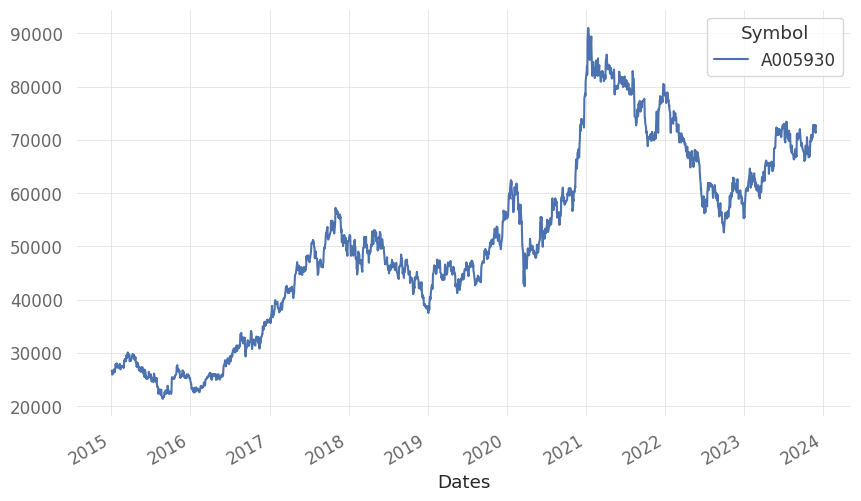

In [150]:
data_SSC_nodup.loc[data_SSC_nodup.index.get_level_values(1)=='A005930', 'AdjPrc'].unstack().plot()

<AxesSubplot: xlabel='Dates'>

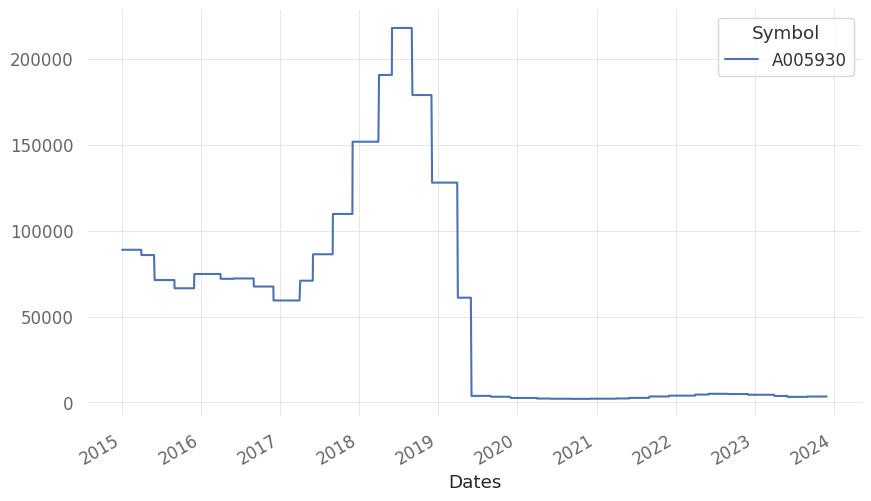

In [153]:
eps_L4[eps_L4.index.get_level_values(1)=='A005930'].unstack().plot()

In [146]:
per_adj=data_SSC_nodup['AdjPrc'] / eps_L4

In [128]:
per_adj[per_adj==np.inf]=None

<AxesSubplot: xlabel='Dates'>

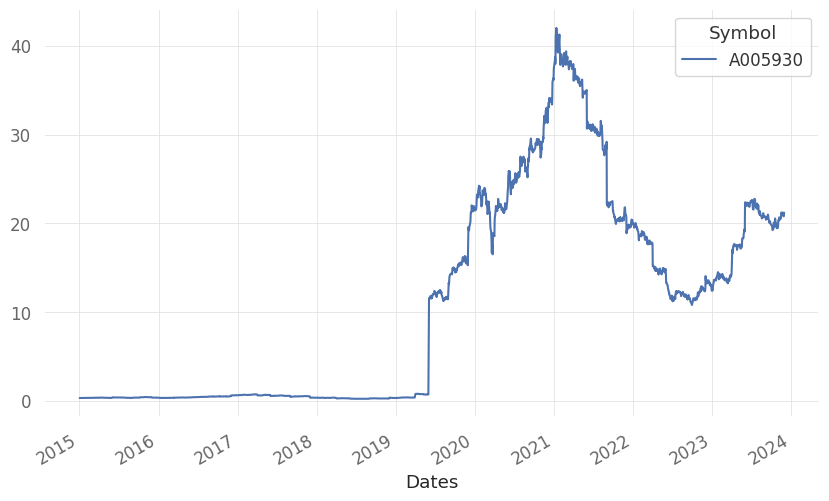

In [138]:
per_adj[per_adj.index.get_level_values(1)=='A005930'].unstack().plot()

<AxesSubplot: xlabel='Dates'>

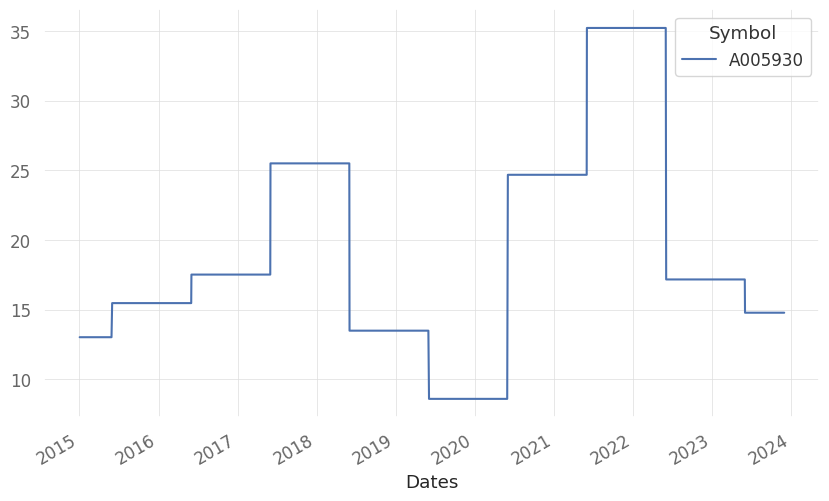

In [144]:
data_NVAL_nodup.loc[data_NVAL_nodup.index.get_level_values(1)=='A005930', 'PER'].unstack().plot()

In [129]:
per_adj[per_adj.index.get_level_values(0)==sample_date].describe()

count      800.000000
mean        43.559905
std        964.953136
min      -1575.862069
25%         -2.000400
50%          8.537862
75%         17.537218
max      27057.142857
dtype: float64

In [132]:
per_adj[per_adj.index.get_level_values(0)==sample_date].sort_values().dropna()

Dates       Symbol 
2023-11-29  A003460    -1575.862069
            A373220     -702.355326
            A005360     -627.408994
            A001570     -549.051638
            A008350     -538.461538
                           ...     
            A101530      464.813206
            A011790      845.793152
            A101140      926.587302
            A004980     1993.135011
            A002700    27057.142857
Length: 800, dtype: float64

<AxesSubplot: xlabel='Dates,Symbol'>

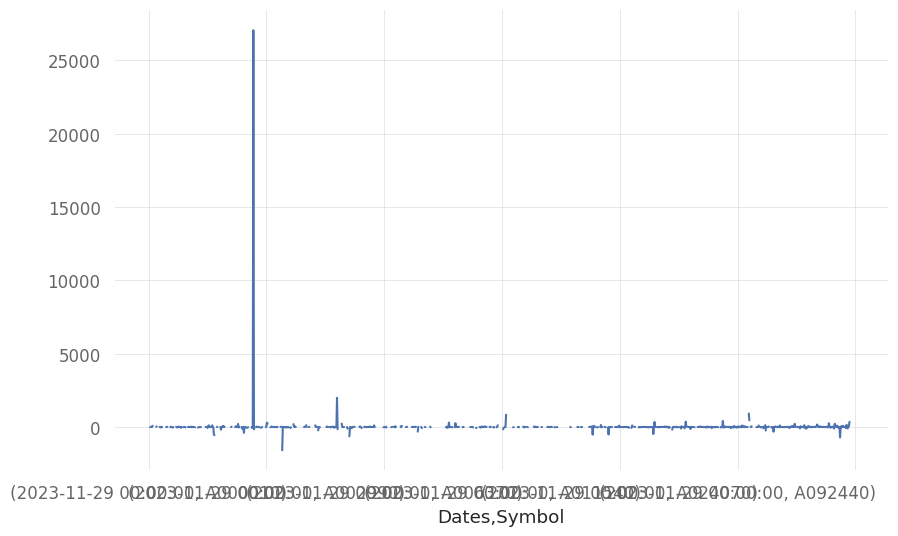

In [123]:
per_adj[per_adj.index.get_level_values(0)==sample_date].plot()

<AxesSubplot: xlabel='Dates,Symbol'>

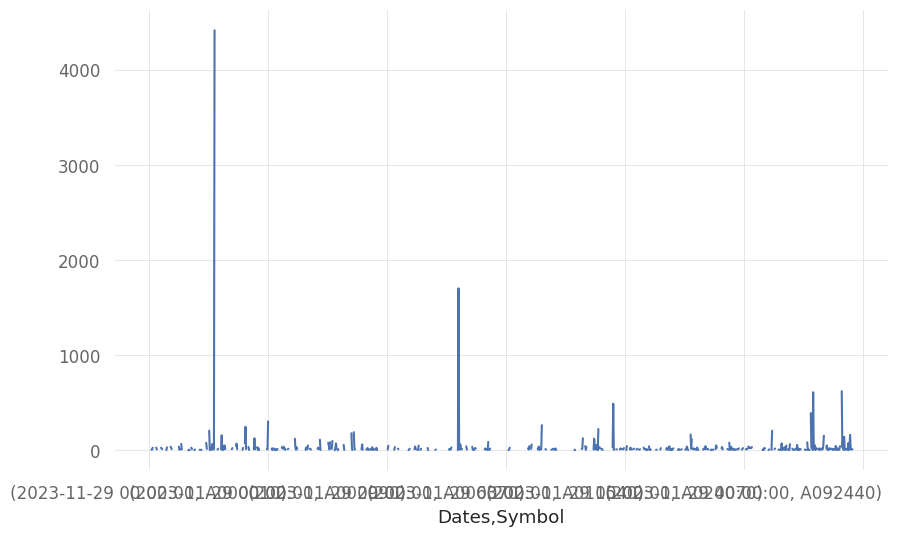

In [161]:
data_NVAL_nodup.loc[data_NVAL_nodup.index.get_level_values(0)==sample_date', 'PER'].plot()

## EPS Growth
### John Neff: over 7% less than 20% 

In [154]:
eps_chg=(data_NVAL_nodup['EPS_TQ']/data_NVAL_nodup['EPS_LQ'])-1

<AxesSubplot: xlabel='Dates,Symbol'>

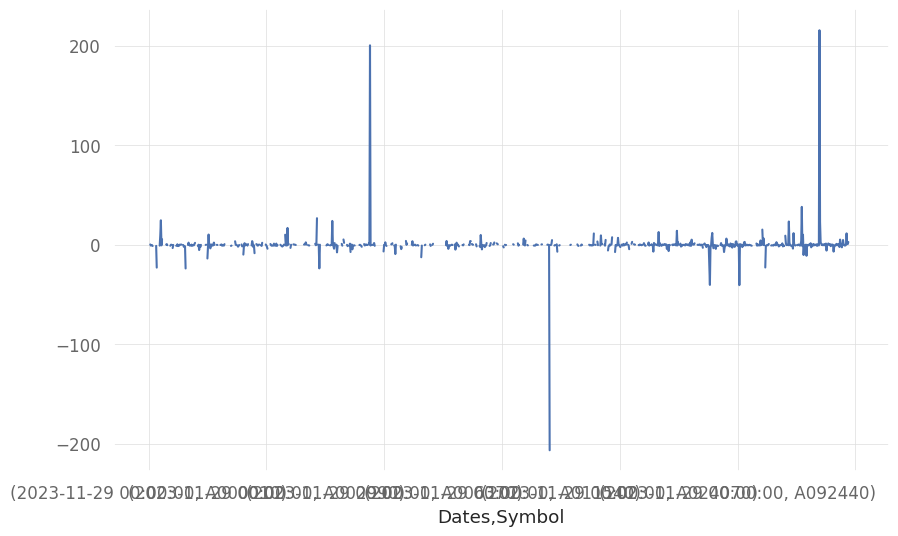

In [162]:
eps_chg[eps_chg.index.get_level_values(0)==sample_date].plot()

In [166]:
eps_chg[eps_chg.index.get_level_values(0)==sample_date].describe()

count    800.000000
mean      -0.019015
std       13.504548
min     -206.690299
25%       -0.951085
50%       -0.378485
75%        0.170150
max      215.470874
dtype: float64

## FCF - no data

In [167]:
data_NFS_nodup

Name          NICI        CIE_TQ        CIE_LQ  \
Dates      Symbol                                                          
2015-01-02 A000010        조흥은행  1.455220e+09  2.039860e+10  1.989050e+10   
           A000020        동화약품  4.937200e+06           NaN           NaN   
           A000030        우리은행  1.213980e+09  1.833720e+10  1.808100e+10   
           A000040       KR모터스 -1.272780e+07  4.842840e+07  5.150330e+07   
           A000050          경방  1.148800e+07  6.413970e+08  6.407050e+08   
...                        ...           ...           ...           ...   
2023-11-29 A900140    엘브이엠씨홀딩스 -3.818530e+07  4.348720e+08  4.511470e+08   
           A950010    평산차업 KDR           NaN           NaN           NaN   
           A950070        중국고섬           NaN           NaN           NaN   
           A950100      SBI모기지           NaN           NaN           NaN   
           A950210  프레스티지바이오파마 -2.114500e+08  4.505110e+08  4.574300e+08   

                         CIE_2LQ       CIE_3LQ      NICI_TQ      NICI_LQ  \
Dates      Symbol                                                          
2015-01-02 A000010  2.056250e+10  2.053340e+10  430096000.0  416784000.0   
           A000020           NaN  2.272310e+08          NaN          NaN   
           A000030  1.794460e+10  1.784760e+10  181029000.0  873181000.0   
           A000040  5.457730e+07  5.731470e+07   -3162460.0   -3090250.0   
           A000050  6.392520e+08  6.364570e+08     528695.0    2477560.0   
...                          ...           ...          ...          ...   
2023-11-29 A900140  4.051900e+08  4.890240e+08  -18399100.0   -7770440.0   
           A950010           NaN           NaN          NaN          NaN   
           A950070           NaN           NaN          NaN          NaN   
           A950100           NaN           NaN          NaN          NaN   
           A950210  4.607210e+08  5.265800e+08   -9076310.0  -14353400.0   

                       NICI_2LQ     NICI_3LQ  ...  Current_Assets_2LQ  \
Dates      Symbol                             ...                       
2015-01-02 A000010  425088000.0  283294000.0  ...                 NaN   
           A000020          NaN          0.0  ...         119540205.0   
           A000030  322777000.0 -954507000.0  ...                 NaN   
           A000040   -5273170.0   -4910730.0  ...          82824122.0   
           A000050    3197230.0    5358850.0  ...          78426877.0   
...                         ...          ...  ...                 ...   
2023-11-29 A900140  -28609800.0   -8311140.0  ...                 NaN   
           A950010          NaN          NaN  ...                 NaN   
           A950070          NaN          NaN  ...                 NaN   
           A950100          NaN          NaN  ...                 NaN   
           A950210  -18278400.0   59277400.0  ...         222134724.0   

                    Current_Assets_3LQ  LT_libilities_TQ  LT_libilities_LQ  \
Dates      Symbol                                                            
2015-01-02 A000010                 NaN               NaN               NaN   
           A000020        1.167599e+08               0.0               0.0   
           A000030                 NaN               NaN               NaN   
           A000040        5.969776e+07               0.0               0.0   
           A000050        7.948280e+07        18833330.0        10393062.0   
...                                ...               ...               ...   
2023-11-29 A900140                 NaN               NaN               NaN   
           A950010                 NaN               NaN               NaN   
           A950070                 NaN               NaN               NaN   
           A950100                 NaN               NaN               NaN   
           A950210        2.549977e+08         1513800.0         1298604.0   

                    LT_libilities_2LQ  LT_libilities_3LQ  Reserved_Amt_TQ  \
Dates 

In [472]:
data_NFS_nodup.index.get_level_values(0).unique()

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2023-11-16', '2023-11-17', '2023-11-20', '2023-11-21',
               '2023-11-22', '2023-11-23', '2023-11-24', '2023-11-27',
               '2023-11-28', '2023-11-29'],
              dtype='datetime64[ns]', name='Dates', length=2194, freq=None)

In [473]:
import os
import sys

sys.path.append('../py')

import data_processing as proc
import utils
import performance as perf


# import DNN_torch as dnn
# import input_feature_engineering as ife
# import target_feature_engineering as tfe
# import check_features as check_feat

In [474]:
data_dates=data_NFS_nodup.index.get_level_values(0).unique()
data_dates = pd.to_datetime(data_dates)
rebal_dates = proc.find_entire_rebalancing_dates(data_dates)

lack of the beginning part of data  2014-12-31 00:00:00 2015-01-02 00:00:00
expected date is not in inner dates 2015-01-31 00:00:00
2015-01-31 00:00:00 2015-01-30 00:00:00
expected date is not in inner dates 2015-02-28 00:00:00
2015-02-28 00:00:00 2015-02-27 00:00:00
expected date is not in inner dates 2015-05-31 00:00:00
2015-05-31 00:00:00 2015-05-29 00:00:00
expected date is not in inner dates 2015-10-31 00:00:00
2015-10-31 00:00:00 2015-10-30 00:00:00
expected date is not in inner dates 2015-12-31 00:00:00
2015-12-31 00:00:00 2015-12-30 00:00:00
expected date is not in inner dates 2016-01-31 00:00:00
2016-01-31 00:00:00 2016-01-29 00:00:00
expected date is not in inner dates 2016-04-30 00:00:00
2016-04-30 00:00:00 2016-04-29 00:00:00
expected date is not in inner dates 2016-07-31 00:00:00
2016-07-31 00:00:00 2016-07-29 00:00:00
expected date is not in inner dates 2016-12-31 00:00:00
2016-12-31 00:00:00 2016-12-29 00:00:00
expected date is not in inner dates 2017-04-30 00:00:00
2017

/home/hyungshin.lee/processing/../py/data_processing.py:300: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  temp_idx = inner_dates.get_loc(expected_rebal_dates[i], method='ffill')


In [476]:
rebal_dates[12:]

DatetimeIndex(['2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
               '2016-05-31', '2016-06-30', '2016-07-29', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-29',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-28',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-29', '2017-10-31', '2017-11-30', '2017-12-28',
               '2018-01-31', '2018-02-28', '2018-03-30', '2018-04-30',
               '2018-05-31', '2018-06-29', '2018-07-31', '2018-08-31',
               '2018-09-28', '2018-10-31', '2018-11-30', '2018-12-28',
               '2019-01-31', '2019-02-28', '2019-03-29', '2019-04-30',
               '2019-05-31', '2019-06-28', '2019-07-31', '2019-08-30',
               '2019-09-30', '2019-10-31', '2019-11-29', '2019-12-30',
               '2020-01-31', '2020-02-28', '2020-03-31', '2020-04-29',
               '2020-05-29', '2020-06-30', '2020-07-31', '2020-08-31',
      

## Contrarian 

## John Neff
### excl FCF, EPS con, EPS

In [333]:
temp_data_COM_nodup=data_COM_nodup[data_COM_nodup.index.get_level_values(0)==sample_date]
temp_data_SSC_nodup=data_SSC_nodup[data_SSC_nodup.index.get_level_values(0)==sample_date]
temp_data_CIA_nodup=data_CIA_nodup[data_CIA_nodup.index.get_level_values(0)==sample_date]
temp_data_CON_nodup=data_CON_nodup[data_CON_nodup.index.get_level_values(0)==sample_date]

temp_data_NFS_nodup=data_NFS_nodup[data_NFS_nodup.index.get_level_values(0)==sample_date]
temp_data_NFCF_nodup=data_NFCF_nodup[data_NFCF_nodup.index.get_level_values(0)==sample_date]
temp_data_NFR_nodup=data_NFR_nodup[data_NFR_nodup.index.get_level_values(0)==sample_date]
temp_data_NVAL_nodup=data_NVAL_nodup[data_NVAL_nodup.index.get_level_values(0)==sample_date]
temp_data_FS_nodup=data_FS_nodup[data_FS_nodup.index.get_level_values(0)==sample_date]


In [344]:
past_1y_idx=data_NVAL_nodup.index.get_level_values(0).unique().get_loc(sample_date)-250
past_1y_date=data_NVAL_nodup.index.get_level_values(0).unique()[past_1y_idx]
past1y_data_NVAL_nodup=data_NVAL_nodup[data_NVAL_nodup.index.get_level_values(0)==past_1y_date]


In [257]:
temp_per=temp_data_NVAL_nodup['PER']

In [258]:
temp_per.describe()

count     613.000000
mean       38.125057
std       198.154657
min         0.950000
25%         7.150000
50%        12.690000
75%        25.090000
max      4413.010000
Name: PER, dtype: float64

In [394]:
temp_eps=temp_data_NVAL_nodup[['EPS_TQ', 'EPS_LQ', 'EPS_2LQ', 'EPS_3LQ']]
past1y_eps=past1y_data_NVAL_nodup[['EPS_TQ', 'EPS_LQ', 'EPS_2LQ', 'EPS_3LQ']]

temp_eps_chg_tq=(temp_eps['EPS_TQ']/temp_eps['EPS_LQ']) -1
temp_eps_chg_lq=(temp_eps['EPS_LQ'] /temp_eps['EPS_2LQ']) -1
temp_eps_chg_2lq=(temp_eps['EPS_2LQ'] /temp_eps['EPS_3LQ']) -1

temp_eps_tq_chg_y=(temp_eps['EPS_TQ'] /past1y_eps['EPS_TQ']).dropna()-1
temp_eps_lq_chg_y=(temp_eps['EPS_LQ'] /past1y_eps['EPS_LQ']).dropna()-1
temp_eps_2lq_chg_y=(temp_eps['EPS_2LQ'] /past1y_eps['EPS_2LQ']).dropna()-1
temp_eps_3lq_chg_y=(temp_eps['EPS_3LQ'] /past1y_eps['EPS_3LQ']).dropna()-1

In [350]:
temp_eps_chg_tq.describe()

count    800.000000
mean      -0.019015
std       13.504548
min     -206.690299
25%       -0.951085
50%       -0.378485
75%        0.170150
max      215.470874
dtype: float64

In [242]:
cond_JN1=temp_per[(temp_per < temp_per.quantile(.75)) & (temp_per > temp_per.quantile(.25))]
cond_JN2=temp_eps_tq_chg_y[(temp_eps_tq_chg_y>.03) & (temp_eps_tq_chg_y<1)]
cond_JN3=(temp_eps_tq_chg_y>0) & (temp_eps_lq_chg_y>0) & (temp_eps_2lq_chg_y>0) & (temp_eps_3lq_chg_y>0)
cond_JN3.replace(False, None, inplace=True)

In [254]:
cond_JN3

Dates       Symbol 
2023-11-29  A003850    None
            A003920    None
            A003960    True
            A004020    None
            A004090    None
                       ... 
            A450140    None
            A452260    None
            A453340    None
            A457190    None
            A950210    None
Length: 381, dtype: object

In [255]:
pd.concat([cond_JN1, cond_JN2, cond_JN3], axis=1).dropna()

PER    EPS_TQ     0
Dates      Symbol                        
2023-11-29 A145990   7.39  0.936886  True
           A259960  16.92  0.189194  True

## John Neff selling strategy
### broken fundamental(5yr growth & earning estimate)
### price expectation(earning estimate + expected PE)

## David Dreman
### excl payout ratio (=dps/eps, lack of dps data)

In [490]:
temp_per=temp_data_NVAL_nodup['PER']

In [388]:
temp_pcr=temp_data_NVAL_nodup['PCR']

In [409]:
temp_pbr=temp_data_NVAL_nodup[['PBR_TQ', 'PBR_LQ', 'PBR_2LQ', 'PBR_3LQ']]

In [408]:
temp_pbr_avg=temp_pbr.mean(1)

In [272]:
temp_pbr_avg.describe()

count    804.000000
mean       1.337268
std        2.061758
min        0.135000
25%        0.509375
50%        0.812500
75%        1.390000
max       29.392500
dtype: float64

In [413]:
temp_dps=temp_data_NFCF_nodup[['DPS_Adj_TQ', 'DPS_Adj_LQ', 'DPS_Adj_2LQ', 'DPS_Adj_3LQ']]

In [352]:
temp_mktcap=temp_data_SSC_nodup['MktCap']

In [282]:
temp_eps_chg_tq[temp_eps_chg_tq>0] # & (temp_eps_tq_chg_y >0)

Dates       Symbol 
2023-11-29  A000040     0.165335
            A000180     0.426449
            A000220     9.369957
            A000230    24.438913
            A000270     5.285747
                         ...    
            A381970     0.194260
            A446070    11.278523
            A450140     0.607909
            A452260     0.557143
            A453340     2.587628
Length: 254, dtype: float64

In [297]:
temp_eps_chg_avg=pd.concat([temp_eps_chg_tq, temp_eps_chg_lq, temp_eps_chg_2lq], axis=1).mean(1)

In [355]:
temp_cr=temp_data_NFR_nodup[['Current_Ratio_TQ', 'Current_Ratio_LQ', 'Current_Ratio_2LQ', 'Current_Ratio_3LQ']].mean(1)

<ipython-input-355-b6138d0a2019>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_cr=temp_data_NFR_nodup[['Current_Ratio_TQ', 'Current_Ratio_LQ', 'Current_Ratio_2LQ', 'Current_Ratio_3LQ']].mean(1)


In [329]:
pd.concat([pd.DataFrame(data_COM_nodup['FG_IndustryGroup_Idx'].unique()).sort_values(0).reset_index(), 
           pd.DataFrame(data_COM_nodup['FG_IndustryGroup27'].unique()).sort_values(0).reset_index()], axis=1)

,index,0,index,0
0,21.0,기타금융,19,건설
1,20.0,내구 소비재 및 의류,6,금속및광물
2,8.0,디스플레이,25,기타 소재
3,23.0,미디어,24,기타금융
4,2.0,반도체,11,기타자본재
5,11.0,보험,23,내구소비재및의류
6,24.0,부동산,8,디스플레이
7,17.0,상업서비스,27,미디어
8,16.0,생활용품,2,반도체
9,19.0,소비자 서비스,12,보험


In [362]:
temp_sector_cr=pd.concat([temp_data_COM_nodup['FG_IndustryGroup27'], temp_cr], axis=1)
temp_sector_cr_avg=temp_sector_cr.groupby('FG_IndustryGroup27').mean()

In [377]:
temp_sector_cr_avg.reset_index()

,FG_IndustryGroup27,0
0,건설,131.772308
1,금속및광물,344.733590
2,기타 소재,162.861905
3,기타금융,261.771667
4,기타자본재,357.108817
5,내구소비재및의류,215.637037
6,디스플레이,37.803333
7,미디어,137.672917
8,반도체,371.101852
9,보험,NaN


In [384]:
temp_sector_cr['avg']=temp_sector_cr['FG_IndustryGroup27'].map(temp_sector_cr_avg[0])

In [442]:
# temp_sector_cr['above_avg']



In [419]:
temp_roe=temp_data_NFR_nodup[['ROE_TQ', 'ROE_LQ', 'ROE_2LQ', 'ROE_3LQ']]
temp_roe_avg= temp_roe.mean(1)


5.3175

In [422]:
temp_roe_avg.quantile(.75)

11.309999999999999

In [427]:
temp_le=temp_data_NFS_nodup[['LE_TQ', 'LE_LQ', 'LE_2LQ', 'LE_3LQ']]
temp_le_avg=temp_le.mean(1)

In [429]:
temp_le_avg.describe()

count      860.000000
mean       212.410048
std        673.693613
min     -11114.357500
25%         44.687500
50%         96.070000
75%        186.400000
max      10728.425000
dtype: float64

In [444]:
cond_DD_per=temp_per[temp_per< temp_per.quantile(.2)]
cond_DD_pcr=temp_pcr[temp_pcr<temp_pcr.quantile(.2)]
cond_DD_pbr=temp_pbr_avg[temp_pbr_avg<temp_pbr_avg.quantile(.2)]
cond_DD_mktcap=temp_mktcap[temp_mktcap>temp_mktcap.quantile(.8)]
cond_DD_eps_chg=temp_eps_chg_avg[temp_eps_chg_avg>temp_eps_chg_avg.quantile(.8)]
cond_DD_sector_cr=temp_sector_cr[temp_sector_cr[0] >temp_sector_cr['avg']]
cond_DD_roe=temp_roe_avg[temp_roe_avg > temp_roe_avg.quantile(.75)]
cond_DD_le=temp_le_avg[(temp_le_avg>0) & (temp_le_avg< temp_le_avg.quantile(.25))]

In [469]:
pd.concat([cond_DD_per, 
           cond_DD_pcr, 
           cond_DD_pbr, 
           # cond_DD_mktcap, 
           # cond_DD_eps_chg
           cond_DD_sector_cr,
           cond_DD_roe,
           cond_DD_le
          ], axis=1).dropna()

,,PER,PCR,0,FG_IndustryGroup27,0,avg,1,2
Dates,Symbol,,,,,,,,
2023-11-29,A011200,0.95,0.88,0.445,운송,624.746667,149.048889,21.49,28.715


In [451]:
cond_DD_per

Dates       Symbol 
2023-11-29  A000320    4.12
            A000370    1.95
            A000540    1.49
            A000850    2.00
            A000950    1.10
                       ... 
            A317400    3.98
            A353200    5.46
            A375500    4.44
            A377740    5.38
            A378850    5.38
Name: PER, Length: 123, dtype: float64

In [453]:
cond_DD_per

Dates       Symbol 
2023-11-29  A000320    4.12
            A000370    1.95
            A000540    1.49
            A000850    2.00
            A000950    1.10
                       ... 
            A317400    3.98
            A353200    5.46
            A375500    4.44
            A377740    5.38
            A378850    5.38
Name: PER, Length: 123, dtype: float64

In [454]:
cond_DD_pbr

Dates       Symbol 
2023-11-29  A000050    0.3700
            A000070    0.3425
            A000140    0.2075
            A000180    0.3950
            A000210    0.3875
                        ...  
            A294870    0.2375
            A316140    0.3550
            A344820    0.4450
            A375500    0.3625
            A452260    0.4100
Length: 161, dtype: float64

In [455]:
cond_DD_mktcap

Dates       Symbol 
2023-11-29  A005930    434003191.0
            A373220    104598000.0
            A000660     94931508.0
            A207940     51885846.0
            A051910     35578541.0
                          ...     
            A185750      1557233.0
            A007660      1884743.0
            A002710      1412918.0
            A003230      1630898.0
            A298040      1976804.0
Name: MktCap, Length: 161, dtype: float64

In [456]:
cond_DD_eps_chg

Dates       Symbol 
2023-11-29  A000180     0.426449
            A000220     9.369957
            A000230    24.438913
            A000270     5.285747
            A000390     0.523237
                         ...    
            A380440     4.612412
            A446070    11.278523
            A450140     0.607909
            A452260     0.557143
            A453340     2.587628
Length: 160, dtype: float64

In [457]:
cond_DD_sector_cr

FG_IndustryGroup27              0           avg
Dates      Symbol                                                 
2023-11-29 A005490              금속및광물    2810.263333    344.733590
           A003550              기타자본재     700.826667    357.108817
           A352820                미디어     249.103333    137.672917
           A033780             음식료및담배     201.273333    190.787368
           A018260              소프트웨어     376.630000    274.708611
...                               ...            ...           ...
           A009720               하드웨어  861585.670000  45541.862281
           A051310                에너지     229.756667    106.992143
           A138250                 유통     104.450000     81.739167
           A018360                 의료     459.313333    280.397204
           A009280             자동차및부품   53273.340000   3034.253509

[80 rows x 3 columns]

## backtest

In [780]:
JN_ls=[]
DD_ls=[]

for rb in rebal_dates[12:]:
    sample_date=rb
    
    temp_data_COM_nodup=data_COM_nodup[data_COM_nodup.index.get_level_values(0)==sample_date]
    temp_data_SSC_nodup=data_SSC_nodup[data_SSC_nodup.index.get_level_values(0)==sample_date]
    temp_data_CIA_nodup=data_CIA_nodup[data_CIA_nodup.index.get_level_values(0)==sample_date]
    temp_data_CON_nodup=data_CON_nodup[data_CON_nodup.index.get_level_values(0)==sample_date]

    temp_data_NFS_nodup=data_NFS_nodup[data_NFS_nodup.index.get_level_values(0)==sample_date]
    temp_data_NFCF_nodup=data_NFCF_nodup[data_NFCF_nodup.index.get_level_values(0)==sample_date]
    temp_data_NFR_nodup=data_NFR_nodup[data_NFR_nodup.index.get_level_values(0)==sample_date]
    temp_data_NVAL_nodup=data_NVAL_nodup[data_NVAL_nodup.index.get_level_values(0)==sample_date]
    temp_data_FS_nodup=data_FS_nodup[data_FS_nodup.index.get_level_values(0)==sample_date]
    
    past_1y_idx=data_NVAL_nodup.index.get_level_values(0).unique().get_loc(sample_date)-250
    past_1y_date=data_NVAL_nodup.index.get_level_values(0).unique()[past_1y_idx]
    past1y_data_NVAL_nodup=data_NVAL_nodup[data_NVAL_nodup.index.get_level_values(0)==past_1y_date]
    
    temp_per=temp_data_NVAL_nodup['PER']

    temp_eps=temp_data_NVAL_nodup[['EPS_TQ', 'EPS_LQ', 'EPS_2LQ', 'EPS_3LQ']]
    past1y_eps=past1y_data_NVAL_nodup[['EPS_TQ', 'EPS_LQ', 'EPS_2LQ', 'EPS_3LQ']]

    temp_eps_chg_tq=(temp_eps['EPS_TQ']/temp_eps['EPS_LQ']) -1
    temp_eps_chg_lq=(temp_eps['EPS_LQ'] /temp_eps['EPS_2LQ']) -1
    temp_eps_chg_2lq=(temp_eps['EPS_2LQ'] /temp_eps['EPS_3LQ']) -1

    temp_eps_tq_chg_y=(temp_eps['EPS_TQ'].values /past1y_eps['EPS_TQ'].values)
    temp_eps_tq_chg_y=pd.DataFrame(temp_eps_tq_chg_y, index=temp_eps.index).dropna()-1
    
    temp_eps_lq_chg_y=(temp_eps['EPS_LQ'].values /past1y_eps['EPS_LQ'].values)
    temp_eps_lq_chg_y=pd.DataFrame(temp_eps_lq_chg_y, index=temp_eps.index).dropna()-1
    
    temp_eps_2lq_chg_y=(temp_eps['EPS_2LQ'].values /past1y_eps['EPS_2LQ'].values)
    temp_eps_2lq_chg_y=pd.DataFrame(temp_eps_2lq_chg_y, index=temp_eps.index).dropna()-1
    
    temp_eps_3lq_chg_y=(temp_eps['EPS_3LQ'].values /past1y_eps['EPS_3LQ'].values)
    temp_eps_3lq_chg_y=pd.DataFrame(temp_eps_3lq_chg_y, index=temp_eps.index).dropna()-1
    
    
    cond_JN1=temp_per[(temp_per < temp_per.quantile(.75)) & (temp_per > temp_per.quantile(.25))]
    
    cond_JN2=temp_eps_tq_chg_y[(temp_eps_tq_chg_y>temp_eps_tq_chg_y.quantile(.25)) & 
                                (temp_eps_tq_chg_y<temp_eps_tq_chg_y.quantile(.75))]
    
    cond_JN3=((temp_eps_tq_chg_y>temp_eps_tq_chg_y.quantile(.5)) & 
            (temp_eps_lq_chg_y>temp_eps_lq_chg_y.quantile(.5)) & 
            (temp_eps_2lq_chg_y>temp_eps_2lq_chg_y.quantile(.5)) & 
            (temp_eps_3lq_chg_y>temp_eps_3lq_chg_y.quantile(.5)))
    cond_JN3.replace(False, None, inplace=True)
    
    
    JN_temp=pd.concat([cond_JN1, cond_JN2, cond_JN3], axis=1).dropna()
    
    if len(JN_temp)<3:
        print('No JN port1')
        JN_temp=pd.concat([cond_JN1, cond_JN2], axis=1).dropna()
        
        if len(JN_temp)<2:
            print('No JN port2')
            JN_temp=pd.concat([cond_JN1], axis=1).dropna()
            
            if len(JN_temp)<1:
                print('No JN port3')
                break
            
    
    JN_ls.append(JN_temp)
    temp_per=temp_data_NVAL_nodup['PER']
    temp_pcr=temp_data_NVAL_nodup['PCR']
    temp_pbr=temp_data_NVAL_nodup[['PBR_TQ', 'PBR_LQ', 'PBR_2LQ', 'PBR_3LQ']]
    temp_pbr_avg=temp_pbr.mean(1)
    
    temp_mktcap=temp_data_SSC_nodup['MktCap']
    temp_eps_chg_avg=pd.concat([temp_eps_chg_tq, temp_eps_chg_lq, temp_eps_chg_2lq], axis=1).mean(1)
    temp_cr=temp_data_NFR_nodup[['Current_Ratio_TQ', 'Current_Ratio_LQ', 'Current_Ratio_2LQ', 'Current_Ratio_3LQ']].mean(1)
    
    temp_sector_cr=pd.concat([temp_data_COM_nodup['FG_IndustryGroup27'], temp_cr], axis=1)
    temp_sector_cr_avg=temp_sector_cr.groupby('FG_IndustryGroup27').mean()
    temp_sector_cr['avg']=temp_sector_cr['FG_IndustryGroup27'].map(temp_sector_cr_avg[0])
    
    temp_roe=temp_data_NFR_nodup[['ROE_TQ', 'ROE_LQ', 'ROE_2LQ', 'ROE_3LQ']]
    temp_roe_avg= temp_roe.mean(1)
    
    temp_le=temp_data_NFS_nodup[['LE_TQ', 'LE_LQ', 'LE_2LQ', 'LE_3LQ']]
    temp_le_avg=temp_le.mean(1)
    
    cond_DD_per=temp_per[temp_per< temp_per.quantile(.2)]
    cond_DD_pcr=temp_pcr[temp_pcr<temp_pcr.quantile(.2)]
    cond_DD_pbr=temp_pbr_avg[temp_pbr_avg<temp_pbr_avg.quantile(.2)]
    cond_DD_mktcap=temp_mktcap[temp_mktcap>temp_mktcap.quantile(.7)]
    cond_DD_eps_chg=temp_eps_chg_avg[temp_eps_chg_avg>temp_eps_chg_avg.quantile(.7)]
    cond_DD_sector_cr=temp_sector_cr[temp_sector_cr[0] >temp_sector_cr['avg']]
    cond_DD_roe=temp_roe_avg[temp_roe_avg > temp_roe_avg.quantile(.7)]
    cond_DD_le=temp_le_avg[(temp_le_avg>0) & (temp_le_avg< temp_le_avg.quantile(.3))]
    
    DD_temp=pd.concat([cond_DD_per, 
                       cond_DD_pcr, 
                       cond_DD_pbr, 
                       # cond_DD_sector_cr,
                       # cond_DD_roe,
                       # cond_DD_le

                       # cond_DD_mktcap, 
                       # cond_DD_eps_chg
                      ], axis=1).dropna()

    if len(DD_temp)<5:
        print('No DD port1')
        DD_temp=pd.concat([cond_DD_per, 
                           cond_DD_pcr, 
                           cond_DD_pbr, 
                           cond_DD_sector_cr,
                           cond_DD_roe
                          ], axis=1).dropna()
        
        
        if len(DD_temp)<3:
            print('No DD port2')
            DD_temp=pd.concat([cond_DD_per, 
                               cond_DD_pcr, 
                               cond_DD_pbr, 
                               cond_DD_sector_cr
                              ], axis=1).dropna()
        

            if len(DD_temp)<1:
                print('No DD port3')
                DD_temp=pd.concat([cond_DD_per, 
                                   cond_DD_pcr, 
                                   cond_DD_pbr 
                                  ], axis=1).dropna()
                
                if len(DD_temp)==0:
                    print('No DD port4')

                    break
                    
    DD_ls.append(DD_temp)

<ipython-input-780-1ca358a08e26>:40: RuntimeWarning: divide by zero encountered in divide
  temp_eps_3lq_chg_y=(temp_eps['EPS_3LQ'].values /past1y_eps['EPS_3LQ'].values)
<ipython-input-780-1ca358a08e26>:40: RuntimeWarning: invalid value encountered in divide
  temp_eps_3lq_chg_y=(temp_eps['EPS_3LQ'].values /past1y_eps['EPS_3LQ'].values)
<ipython-input-780-1ca358a08e26>:79: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_cr=temp_data_NFR_nodup[['Current_Ratio_TQ', 'Current_Ratio_LQ', 'Current_Ratio_2LQ', 'Current_Ratio_3LQ']].mean(1)
<ipython-input-780-1ca358a08e26>:40: RuntimeWarning: divide by zero encountered in divide
  temp_eps_3lq_chg_y=(temp_eps['EPS_3LQ'].values /past1y_eps['EPS_3LQ'].values)
<ipython-input-780-1ca358a08e26>:40: RuntimeWarning: invalid value encountered in divide
  temp_eps_3lq_chg_y=(temp_ep

In [781]:
len(JN_ls), len(DD_ls)

(95, 95)

In [782]:
adj_prc=data_SSC_nodup['AdjPrc'].unstack()

In [783]:
JN_port=pd.concat(JN_ls)

In [784]:
DD_ls

[                     PER   PCR       0
 Dates      Symbol                     
 2016-01-29 A000540  7.61  5.49  0.6000
            A001520  0.26  0.26  0.6125
            A002200  8.85  4.79  0.4225
            A003030  9.52  5.71  0.3975
            A004020  9.85  3.86  0.5450
            A004090  7.57  6.27  0.5200
            A004100  4.54  3.03  0.6200
            A004560  8.66  5.01  0.6375
            A005010  8.82  4.57  0.3300
            A005430  5.05  3.40  0.4425
            A008900  0.31  0.30  0.5475
            A010690  3.60  2.85  0.5400
            A013870  6.82  3.66  0.5750
            A016590  7.19  4.41  0.5325
            A016880  0.69  0.67  0.3975
            A017370  5.39  4.04  0.6150
            A019180  3.66  2.85  0.4625
            A069730  6.23  2.50  0.4800
            A071320  9.81  2.39  0.4400
            A088790  4.29  3.79  0.5400
            A092220  4.07  2.32  0.5325
            A103140  7.52  4.64  0.6200
            A155660  8.85  6.01  0.5475,

In [785]:
DD_ls_adj=[dd.iloc[:, :2] for dd in DD_ls]

In [786]:
DD_port=pd.concat(DD_ls_adj)

In [787]:
port_df_JN=pd.DataFrame(index=adj_prc.loc[JN_port.index.get_level_values(0)[0]:JN_port.index.get_level_values(0)[-1]].index, 
                     columns=adj_prc.columns)

port_df_DD=pd.DataFrame(index=adj_prc.loc[DD_port.index.get_level_values(0)[0]:DD_port.index.get_level_values(0)[-1]].index, 
                     columns=adj_prc.columns)

In [788]:
JN_port_w=JN_port.iloc[:, 0].unstack()
JN_port_w[~JN_port_w.isna()]=1
JN_port_w=JN_port_w.div(JN_port_w.sum(1), axis=0)
JN_port_w=JN_port_w.fillna(0)
port_df_JN.loc[JN_port_w.index, JN_port_w.columns]=JN_port_w
port_df_JN=port_df_JN.fillna(method='ffill')
idx_ret_JN=(adj_prc.pct_change().loc[port_df_JN.index, port_df_JN.columns] * port_df_JN).sum(1)
idx_cumret_JN=(1+idx_ret_JN).cumprod()

In [789]:
DD_port_w=DD_port.iloc[:, 0].unstack()
DD_port_w[~DD_port_w.isna()]=1
DD_port_w=DD_port_w.div(DD_port_w.sum(1), axis=0)
DD_port_w=DD_port_w.fillna(0)
port_df_DD.loc[DD_port_w.index, DD_port_w.columns]=DD_port_w
port_df_DD=port_df_DD.fillna(method='ffill')
idx_ret_DD=(adj_prc.pct_change().loc[port_df_DD.index, port_df_DD.columns] * port_df_DD).sum(1)
idx_cumret_DD=(1+idx_ret_DD).cumprod()

In [790]:
bm_cumret=(1+krx_idx.pct_change().loc[idx_cumret_DD.index, ['코스피', '코스피 200']]).cumprod()

In [791]:
idx_ret_JN, idx_ret_cost_JN, idx_cum_ret_JN, idx_cum_retcost_JN = perf.return_index(adj_prc.loc[port_df_JN.index[0]:], 
                                                                        port_df_JN.fillna(0),
                                                                        cost=0.003)

In [792]:
idx_ret_DD, idx_ret_cost_DD, idx_cum_ret_DD, idx_cum_retcost_DD = perf.return_index(adj_prc.loc[port_df_DD.index[0]:], 
                                                                        port_df_DD.fillna(0),
                                                                        cost=0.003)

In [812]:
res_JN=pd.concat([idx_cum_retcost_JN, bm_cumret], axis=1)

In [813]:
res_JN.columns=['JN', 'kospi', 'k200']

<AxesSubplot: xlabel='Dates'>

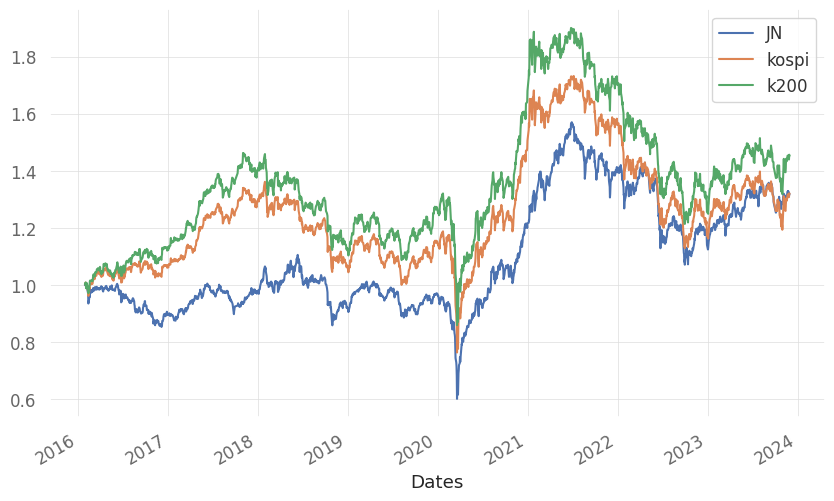

In [814]:
res_JN.plot()

In [815]:
res_DD=pd.concat([idx_cum_retcost_DD, bm_cumret], axis=1)

In [816]:
res_DD.columns=['DD', 'kospi', 'k200']

<AxesSubplot: xlabel='Dates'>

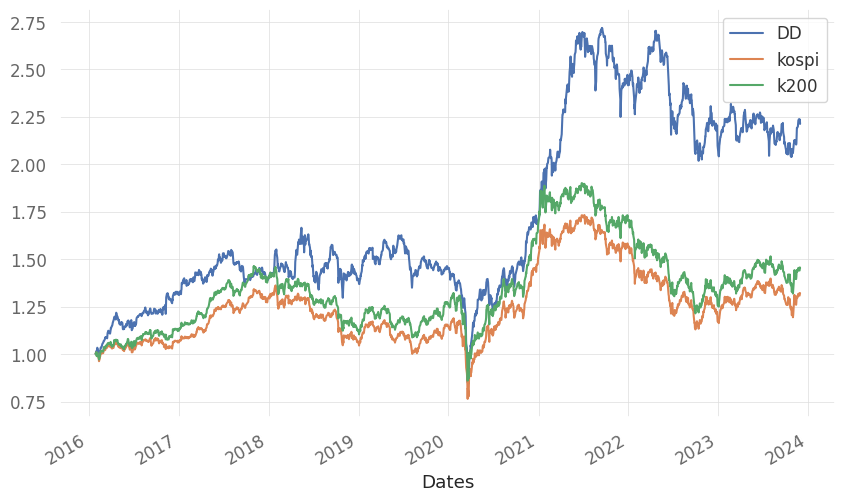

In [817]:
res_DD.plot()

In [796]:
temp_perf1 = perf.analyze_performance(idx_ret_cost_JN, 
                                     model_name = 'John Neff')

temp_perf2 = perf.analyze_performance(idx_ret_cost_DD, 
                                     model_name = 'David Dreman')

temp_perf3 = perf.analyze_performance(krx_idx.pct_change().loc[idx_cumret_DD.index, '코스피 200'], 
                                     model_name = 'K200')

temp_perf4 = perf.analyze_performance(krx_idx.pct_change().loc[idx_cumret_DD.index, '코스피'], 
                                     model_name = 'KOSPI')

In [797]:
pd.concat([temp_perf1, temp_perf2, temp_perf3, temp_perf4], axis=0).T

,John Neff,David Dreman,K200,KOSPI
cum return(%),31.67,121.28,45.29,32.08
cagr(%),3.67,10.95,5.01,3.71
vol(te),0.16,0.19,0.18,0.17
sharpe(ir),0.22,0.57,0.29,0.22
mdd(%),-45.6,-49.22,-41.19,-43.9
turnover(%),0,0,0,0
start date,2016-01-29 00:00:00,2016-01-29 00:00:00,2016-01-29 00:00:00,2016-01-29 00:00:00
end date,2023-11-29 00:00:00,2023-11-29 00:00:00,2023-11-29 00:00:00,2023-11-29 00:00:00


<AxesSubplot: xlabel='Dates'>

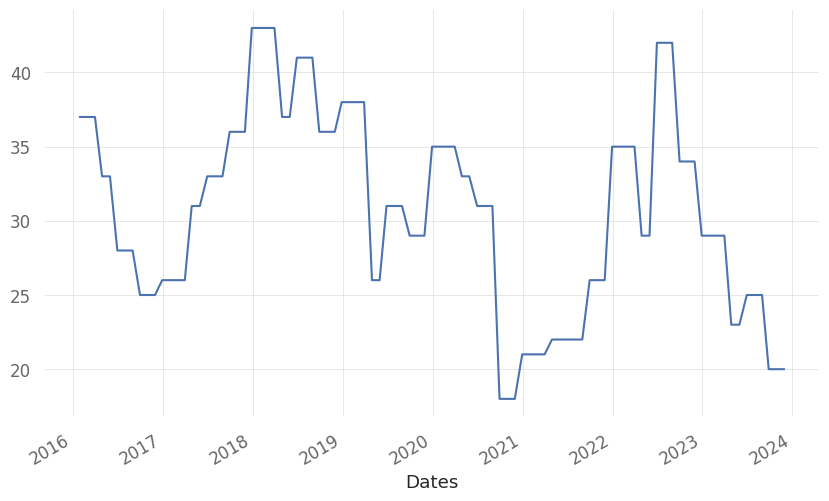

In [798]:
JN_port_w[JN_port_w>0].count(1).plot()

In [829]:
w_diff=abs(JN_port_w.diff(1))
np.sum(w_diff).sum()**(1/(len(w_diff.index)-1)*12)

1.557163856489597

<AxesSubplot: xlabel='Dates'>

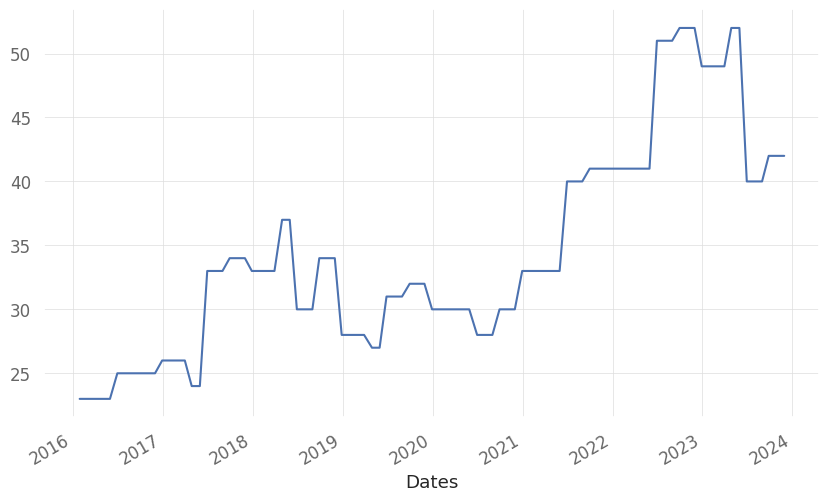

In [800]:
DD_port_w[DD_port_w>0].count(1).plot()

In [830]:
w_diff=abs(DD_port_w.diff(1))
np.sum(w_diff).sum()**(1/(len(w_diff.index)-1)*12)

1.3870129139641874

In [ ]:
import pandas as pd
import numpy as np

# Simulate historical stock prices
np.random.seed(42)
dates = pd.date_range(start='2022-01-01', end='2023-01-01', freq='B')  # Business day frequency
stock_symbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
prices = pd.DataFrame(np.random.randn(len(dates), len(stock_symbols)), index=dates, columns=stock_symbols).cumsum()

# Define a backtesting strategy
def backtest_strategy(prices, strategy):
    """
    Backtest a monthly stock trading strategy.

    Parameters:
    - prices: DataFrame with stock prices
    - strategy: Function that takes prices and returns a DataFrame with buy/sell signals

    Returns:
    - DataFrame with portfolio values
    """
    signals = strategy(prices)
    portfolio_values = pd.DataFrame(index=prices.index, columns=['Cash', 'Portfolio Value'])
    portfolio_values['Cash'].iloc[0] = 1000000  # Initial cash
    portfolio_values['Portfolio Value'].iloc[0] = 1000000

    for i in range(1, len(prices)):
        cash = portfolio_values['Cash'].iloc[i - 1]
        portfolio_value = portfolio_values['Portfolio Value'].iloc[i - 1]

        # Execute buy/sell signals
        for symbol in stock_symbols:
            if signals[symbol].iloc[i] == 1:  # Buy signal
                shares_bought = cash // prices[symbol].iloc[i]
                cash -= shares_bought * prices[symbol].iloc[i]
                portfolio_value += shares_bought * prices[symbol].iloc[i]

            elif signals[symbol].iloc[i] == -1:  # Sell signal
                shares_sold = portfolio_value // prices[symbol].iloc[i]
                cash += shares_sold * prices[symbol].iloc[i]
                portfolio_value -= shares_sold * prices[symbol].iloc[i]

        portfolio_values['Cash'].iloc[i] = cash
        portfolio_values['Portfolio Value'].iloc[i] = portfolio_value

    return portfolio_values

# Example strategy: Buy and hold the top-performing stock each month
def top_performing_stock_strategy(prices):
    signals = pd.DataFrame(index=prices.index, columns=stock_symbols)

    for i in range(1, len(prices)):
        monthly_returns = prices.iloc[i - 1:i].pct_change().iloc[1]
        best_stock = monthly_returns.idxmax()
        signals[best_stock].iloc[i] = 1  # Buy signal

    return signals

# Backtest the strategy
portfolio_values = backtest_strategy(prices, top_performing_stock_strategy)

# Plot the results
portfolio_values.plot(figsize=(10, 6), title='Monthly Stock Backtesting with Holding Amounts')


In [19]:
given_dates=data_COM.index.get_level_values(0)
given_dates=given_dates.unique()
weekly_end_dates=given_dates.to_frame().resample('w-sat').last()
weekly_end_dates=weekly_end_dates['Dates'].tolist()
weekly_end_dates=[x for x in weekly_end_dates if not pd.isnull(x)]

In [20]:
weekly_end_dates

[Timestamp('2015-01-02 00:00:00'),
 Timestamp('2015-01-09 00:00:00'),
 Timestamp('2015-01-16 00:00:00'),
 Timestamp('2015-01-23 00:00:00'),
 Timestamp('2015-01-30 00:00:00'),
 Timestamp('2015-02-06 00:00:00'),
 Timestamp('2015-02-13 00:00:00'),
 Timestamp('2015-02-17 00:00:00'),
 Timestamp('2015-02-27 00:00:00'),
 Timestamp('2015-03-06 00:00:00'),
 Timestamp('2015-03-13 00:00:00'),
 Timestamp('2015-03-20 00:00:00'),
 Timestamp('2015-03-27 00:00:00'),
 Timestamp('2015-04-03 00:00:00'),
 Timestamp('2015-04-10 00:00:00'),
 Timestamp('2015-04-17 00:00:00'),
 Timestamp('2015-04-24 00:00:00'),
 Timestamp('2015-04-30 00:00:00'),
 Timestamp('2015-05-08 00:00:00'),
 Timestamp('2015-05-15 00:00:00'),
 Timestamp('2015-05-22 00:00:00'),
 Timestamp('2015-05-29 00:00:00'),
 Timestamp('2015-06-05 00:00:00'),
 Timestamp('2015-06-12 00:00:00'),
 Timestamp('2015-06-19 00:00:00'),
 Timestamp('2015-06-26 00:00:00'),
 Timestamp('2015-07-03 00:00:00'),
 Timestamp('2015-07-10 00:00:00'),
 Timestamp('2015-07-

In [28]:
data_COM_nodup.shape,data_SSC_nodup.shape, data_CIA_nodup.shape, data_IFRS_nodup.shape, data_CON_nodup.shape

((2627214, 13), (2627214, 33), (2628412, 17), (2628412, 64), (2626717, 65))

In [29]:
temp_data=pd.concat([data_COM_nodup, data_CIA_nodup, data_SSC_nodup, data_IFRS_nodup, data_CON_nodup], axis=1)

In [30]:
temp_data.columns

Index(['Name', 'KC_Industry', 'FG_IndustryGroup27', 'FG_Sector_Idx',
       'FG_IndustryGroup_Idx', 'FG_Industry_Idx', 'AuditOpinion', 'Caution',
       'KSECapSize', 'KLCAIndustry',
       ...
       'PER_E3_6M_Chg', 'PSR_E3', 'ROA_E3', 'ROE_E3_1M_Chg', 'ROE_E3_3M_Chg',
       'ROE_E3_6M_Chg', 'SPS_E3', 'SAE_E3', 'NIP_E3_NextYear',
       'OI_E3_NY_NextYear'],
      dtype='object', length=192)

In [31]:
temp_data.dtypes

Name                     object
KC_Industry              object
FG_IndustryGroup27       object
FG_Sector_Idx            object
FG_IndustryGroup_Idx     object
                         ...   
ROE_E3_6M_Chg           float64
SPS_E3                  float64
SAE_E3                  float64
NIP_E3_NextYear         float64
OI_E3_NY_NextYear       float64
Length: 192, dtype: object

In [32]:
temp_data.shape

(2628412, 192)

In [33]:
temp_data=temp_data.dropna(how='all', axis=0)
temp_data=temp_data.sort_index(0)

<ipython-input-33-89a7c84b08e4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  temp_data=temp_data.sort_index(0)


In [34]:
factor_dict={
'sector': 'CP10000600',
'industry': 'CP10000800',
'mkt':'CP10000300',
'adjPrice':'S410000700',
'trdYN':'S410002600',
'mgtYN':'S410002700',
'tmv':'S420002100',
'trdVol_20avg':'S41000630F',
'trdVol_60avg':'S41000640F',
'trdVol_120avg':'S41000650F',
'trA_20avg_spot':'S410007000',
'trA_60avg_spot':'S410007100',
'epsConNmb':'F710012110',
'k2YN':'CP10000310',
'clsMnth':'CP10002200',
'p_price_spot':'S41000060F',
'pHigh_spot':'S41000040F',
'pLow_spot':'S41000040F',
'retStdev_20_spot':'S410008600',
'retStdev_120_spot':'S410008800',
'senti_invTrst20':'CI20033022',
'senti_invTrst60':'CI20033023',
'senti_invTrst120':'CI20033024',
'senti_inst20':'CI20003022',
'senti_inst60':'CI20003023',
'senti_inst120':'CI20003024',
'senti_forg20':'CI20113022',
'senti_forg60':'CI20113023',
'senti_forg120':'CI20113024',
'epsF_spot':'F730041100',
'epsT_spot':'F730041200',
'bpsF_spot':'F730041250',
'bpsT_spot':'F730041260',
'salesF_spot':'F730041500',
'salesT_spot':'F730041530',
'earningsF_spot':'F730041515',
'earningsT_spot':'F730041545',
'cashFlowF_spot':'F730041585',
'dbtRtQ_':'6000102001',
'totalEQ_0':'6000903001',
'salseQ_0':'6000904001',
'earningsQ_0':'6000906001',
'cashFlowQ_0':'6000909011',
'div_0':'6000706032',
}


### match raw factor codes with DB column

In [35]:
len(list(factor_dict.values()))

44

In [36]:
temp_cols=data_catalog[data_catalog['Item_Code'].isin(list(factor_dict.values()))]['DB_col_name']

In [37]:
temp_cols

9                   Market
10              KOSPI200YN
11             FiscalMonth
13     NetAmt_InvTrust_20D
14     NetAmt_InvTrust_60D
              ...         
136       Sales_E3_12M_Fwd
137        Sales_E3_12M_Tr
146          OI_E3_12M_Fwd
147           OI_E3_12M_Tr
166          CF_E3_12M_Fwd
Name: DB_col_name, Length: 68, dtype: object

In [38]:
cols=temp_data.columns[temp_data.columns.isin(temp_cols)]

In [39]:
len(cols)

68

In [40]:
temp_data[cols][temp_data['KOSPI200YN']=='Y']

Market KOSPI200YN FiscalMonth  NetAmt_InvTrust_20D  \
Dates      Symbol                                                       
2015-01-02 A000030    KSE          Y          12             889611.0   
           A000070    KSE          Y          12              68147.0   
           A000080    KSE          Y          12              34051.0   
           A000100    KSE          Y          12            -474161.0   
           A000120    KSE          Y          12             -89741.0   
...                   ...        ...         ...                  ...   
2023-11-29 A375500    KSE          Y          12             165527.0   
           A377300    KSE          Y          12            -105976.0   
           A381970    KSE          Y          12              20504.0   
           A383220    KSE          Y          12            -877760.0   
           A402340    KSE          Y          12              -2713.0   

                    NetAmt_InvTrust_60D  NetAmt_InvTrust_120D  \
Dates      Symbol                                               
2015-01-02 A000030           -1789730.0            -1789730.0   
           A000070             246983.0             2016480.0   
           A000080             878041.0             1983710.0   
           A000100            -729943.0            -3623330.0   
           A000120            1229670.0             1013750.0   
...                                 ...                   ...   
2023-11-29 A375500             500389.0             -316295.0   
           A377300            -409729.0            -1525960.0   
           A381970            -145780.0             -299170.0   
           A383220            1103530.0             -926514.0   
           A402340           -7825680.0            -7767890.0   

                    NetAmt_Inst_20D  NetAmt_Inst_60D  NetAmt_Inst_120D  \
Dates      Symbol                                                        
2015-01-02 A000030       -3347500.0      -12312900.0       -12312900.0   
           A000070         139209.0         443969.0         1001510.0   
           A000080         707539.0        2575720.0         6770090.0   
           A000100         515293.0        -113501.0        -1173300.0   
           A000120        -852564.0       -1683660.0        -2629850.0   
...                             ...              ...               ...   
2023-11-29 A375500         130609.0         578150.0        -2213890.0   
           A377300        1577280.0        1493590.0        -3377570.0   
           A381970         182404.0        -470638.0         -417797.0   
           A383220       -2326540.0        3445370.0       -10471700.0   
           A402340        5010580.0        5275950.0         4728230.0   

                    NetAmt_For_20D  ...  BPS_E3_12M_Fwd  BPS_E3_12M_Tr  \
Dates      Symbol                   ...                                  
2015-01-02 A000030      -4174030.0  ...        24883.04       23923.13   
           A000070        157094.0  ...            None            NaN   
           A000080      -1133130.0  ...        20800.99       20719.14   
           A000100      -1104380.0  ...        129389.3      122042.12   
           A000120       -309932.0  ...       128700.22      122959.85   
...                            ...  ...             ...            ...   
2023-11-29 A375500       -129728.0  ...       112577.51      104946.97   
           A377300       2002240.0  ...        14130.93       13681.19   
           A381970         93414.0  ...         5294.58        5053.51   
           A383220       1211300.0  ...        43039.19       31404.86   
           A402340        324293.0  ...       114683.57      111166.36   

                   EPS_E3_12M_Fwd  EPS_E3_12M_Tr  Num_EPS_Ests_E1  \
Dates      Symbol                                                   
2015-01-02 A000030        1431.99        1944.91              6.0   
           A000070            NaN            NaN              NaN   
           A000080   

### compute factors
#### - standardize in cross section (mean, std)
#### - winsorization
#### - 


### 1. find columns 

In [41]:
size=data_catalog[data_catalog['Item_Code']==factor_dict['tmv']]['DB_col_name']
div_ratio=data_catalog[data_catalog['Item_Code']==factor_dict['div_0']]['DB_col_name']

close=data_catalog[data_catalog['Item_Code']==factor_dict['p_price_spot']]['DB_col_name']
adjclose=data_catalog[data_catalog['Item_Code']==factor_dict['adjPrice']]['DB_col_name']

trdVol_20avg=data_catalog[data_catalog['Item_Code']==factor_dict['trdVol_20avg']]['DB_col_name']
trdVol_60avg=data_catalog[data_catalog['Item_Code']==factor_dict['trdVol_60avg']]['DB_col_name']

invTrst_20avg=data_catalog[data_catalog['Item_Code']==factor_dict['senti_invTrst20']]['DB_col_name']
invTrst_120avg=data_catalog[data_catalog['Item_Code']==factor_dict['senti_invTrst120']]['DB_col_name']

high=data_catalog[data_catalog['Item_Code']==factor_dict['pHigh_spot']]['DB_col_name']
low=data_catalog[data_catalog['Item_Code']==factor_dict['pLow_spot']]['DB_col_name']

stdev20=data_catalog[data_catalog['Item_Code']==factor_dict['retStdev_20_spot']]['DB_col_name']
stdev120=data_catalog[data_catalog['Item_Code']==factor_dict['retStdev_120_spot']]['DB_col_name']

earning_fwd=data_catalog[data_catalog['Item_Code']==factor_dict['earningsF_spot']]['DB_col_name']
earning_tr=data_catalog[data_catalog['Item_Code']==factor_dict['earningsT_spot']]['DB_col_name']

bps_fwd=data_catalog[data_catalog['Item_Code']==factor_dict['bpsF_spot']]['DB_col_name']
bps_tr=data_catalog[data_catalog['Item_Code']==factor_dict['bpsT_spot']]['DB_col_name']

eps_fwd=data_catalog[data_catalog['Item_Code']==factor_dict['epsF_spot']]['DB_col_name']
eps_tr=data_catalog[data_catalog['Item_Code']==factor_dict['epsT_spot']]['DB_col_name']

earning_Q=data_catalog[data_catalog['Item_Code']==factor_dict['earningsQ_0']]['DB_col_name']
sales_Q=data_catalog[data_catalog['Item_Code']==factor_dict['salseQ_0']]['DB_col_name']

dtoequity=data_catalog[data_catalog['Item_Code']==factor_dict['dbtRtQ_']]['DB_col_name']
equity=data_catalog[data_catalog['Item_Code']==factor_dict['totalEQ_0']]['DB_col_name']

sps_fwd=data_catalog[data_catalog['Item_Code']==factor_dict['salesF_spot']]['DB_col_name']
sps_tr=data_catalog[data_catalog['Item_Code']==factor_dict['salesT_spot']]['DB_col_name']

cf_Q=data_catalog[data_catalog['Item_Code']==factor_dict['cashFlowQ_0']]['DB_col_name']

cf_fwd=data_catalog[data_catalog['Item_Code']==factor_dict['cashFlowF_spot']]['DB_col_name']



netamt_for20=data_catalog[data_catalog['Item_Code']==factor_dict['senti_forg20']]['DB_col_name']
netamt_for60=data_catalog[data_catalog['Item_Code']==factor_dict['senti_forg60']]['DB_col_name']
netamt_for120=data_catalog[data_catalog['Item_Code']==factor_dict['senti_forg120']]['DB_col_name']
trd_amt20=data_catalog[data_catalog['Item_Code']==factor_dict['trA_20avg_spot']]['DB_col_name']
trd_amt60=data_catalog[data_catalog['Item_Code']==factor_dict['trA_60avg_spot']]['DB_col_name']


In [42]:
factor_ls=['size', 
           'dividend', 
           'priceMomentum', 
           'trading', 
           'investSentiment', 
           'epsF_p', 'earningsOtmv', 
           '52H/p_Mom', '52L/p_Mom',
           'dtoequity', 'deltaDtoEquityYoY', 
           'stStevOLtStdev', 'Vol_20D', 'Vol_120D',
           'roeF_proxy', 'roeT_proxy', 'roeQ',
           'dEpsOp', 'rAdjdEpsOp',
           'roeFTMom', 'epsFMom', 'salseFMom', 'roeFchg_proxy', 'slsAdjEarningsYOY', 'sprsEarningsOearningsAvgPstdev',
           'epsFTMom', 'earningsFTMom', 'earningsYOY', 'salesYOY', 'cashFlowYOY', 
           'salesOtmv', 'cashFlowOtmv', 'equityOtmv', 'bpsF_p', 'bpsT_p', 'spsF_p', 'spsT_p', 'cfpsF_p',
           'senti_forg20', 'senti_forg60', 'senti_forg120', 'trA_20avg_spot', 'trA_60avg_spot']
len(factor_ls)

43

In [43]:
train_col = ['size', 'value', 'earningYield', 'quality', 'stability', 'dividend',
       'growth', 'momentum', 'adjMomentum', 'priceMomentum', 'priceReversal',
       'priceStdev', 'trading', 'investSentiment', 
       'senti_forg20', 'senti_forg60', 'senti_forg120', 'trA_20avg_spot', 'trA_60avg_spot']

In [44]:
len(cols), len(train_col)

(68, 19)

In [45]:
temp_data.index.get_level_values(0)

DatetimeIndex(['2015-01-02', '2015-01-02', '2015-01-02', '2015-01-02',
               '2015-01-02', '2015-01-02', '2015-01-02', '2015-01-02',
               '2015-01-02', '2015-01-02',
               ...
               '2023-11-29', '2023-11-29', '2023-11-29', '2023-11-29',
               '2023-11-29', '2023-11-29', '2023-11-29', '2023-11-29',
               '2023-11-29', '2023-11-29'],
              dtype='datetime64[ns]', name='Dates', length=2628412, freq=None)

In [46]:
weekly_end_dates

[Timestamp('2015-01-02 00:00:00'),
 Timestamp('2015-01-09 00:00:00'),
 Timestamp('2015-01-16 00:00:00'),
 Timestamp('2015-01-23 00:00:00'),
 Timestamp('2015-01-30 00:00:00'),
 Timestamp('2015-02-06 00:00:00'),
 Timestamp('2015-02-13 00:00:00'),
 Timestamp('2015-02-17 00:00:00'),
 Timestamp('2015-02-27 00:00:00'),
 Timestamp('2015-03-06 00:00:00'),
 Timestamp('2015-03-13 00:00:00'),
 Timestamp('2015-03-20 00:00:00'),
 Timestamp('2015-03-27 00:00:00'),
 Timestamp('2015-04-03 00:00:00'),
 Timestamp('2015-04-10 00:00:00'),
 Timestamp('2015-04-17 00:00:00'),
 Timestamp('2015-04-24 00:00:00'),
 Timestamp('2015-04-30 00:00:00'),
 Timestamp('2015-05-08 00:00:00'),
 Timestamp('2015-05-15 00:00:00'),
 Timestamp('2015-05-22 00:00:00'),
 Timestamp('2015-05-29 00:00:00'),
 Timestamp('2015-06-05 00:00:00'),
 Timestamp('2015-06-12 00:00:00'),
 Timestamp('2015-06-19 00:00:00'),
 Timestamp('2015-06-26 00:00:00'),
 Timestamp('2015-07-03 00:00:00'),
 Timestamp('2015-07-10 00:00:00'),
 Timestamp('2015-07-

In [47]:
data_ls=[]
skip_period=156
data_generating_period=weekly_end_dates.copy()
normalize_data=False

for idx, compute_date in enumerate(data_generating_period[skip_period:]):
    
    eom_data=temp_data[cols][(temp_data['KOSPI200YN']=='Y') & (temp_data.index.get_level_values(0)==compute_date)]
    past1m_data=temp_data[cols][(temp_data.index.get_level_values(1).isin(eom_data.index.get_level_values(1))) & \
                                (temp_data.index.get_level_values(0)==data_generating_period[skip_period+idx-4])]
    past3m_data=temp_data[cols][(temp_data.index.get_level_values(1).isin(eom_data.index.get_level_values(1))) \
                                & (temp_data.index.get_level_values(0)==data_generating_period[skip_period+idx-12])]
    past12m_data=temp_data[cols][(temp_data.index.get_level_values(1).isin(eom_data.index.get_level_values(1))) \
                                 & (temp_data.index.get_level_values(0)==data_generating_period[skip_period+idx-48])]
    
    eom_data['size']=np.log(eom_data[size])
    eom_data['dividend']=eom_data[div_ratio]
    eom_data['priceMomentum']=(eom_data[adjclose].values / past12m_data[adjclose].values) - (eom_data[adjclose].values / past1m_data[adjclose].values)
    eom_data['trading']=eom_data[trdVol_20avg].values / eom_data[trdVol_60avg].values
    eom_data['investSentiment']=(eom_data[invTrst_20avg].values - eom_data[invTrst_120avg].values)/eom_data[size].values
    eom_data['epsF_p']=eom_data[eps_fwd].values/eom_data[adjclose].values
    eom_data['earningsOtmv']=eom_data[earning_Q[:4]].sum(1).to_frame().values/eom_data[size].values
    eom_data['52H/p_Mom']=eom_data[high].values/eom_data[adjclose].values
    eom_data['52L/p_Mom']=eom_data[low].values/eom_data[adjclose].values
    eom_data['dtoequity']=eom_data[dtoequity.iloc[0]].values/100
    eom_data['deltaDtoEquityYoY']=(past12m_data[dtoequity.iloc[0]].values/100-eom_data[dtoequity.iloc[0]].values/100) # its name is YOY but its data uses prev Q data
    eom_data['stStevOLtStdev']=eom_data[stdev20].values / eom_data[stdev120].values
    eom_data['roeF_proxy']=eom_data[eps_fwd].values/eom_data[bps_fwd].astype(float).values
    eom_data['roeT_proxy']=eom_data[eps_tr].values / eom_data[bps_tr].values
    eom_data['roeQ']=eom_data[earning_Q.iloc[0]].values / eom_data[equity.iloc[0]].values
    eom_data['dEpsOp']=(eom_data[eps_fwd].values-past1m_data[earning_fwd].values)/eom_data[adjclose].values
    eom_data['rAdjdEpsOp']=eom_data['dEpsOp'].to_frame().values/ (eom_data[stdev20].values*np.sqrt(252))
    eom_data['roeFTMom']=eom_data['roeF_proxy']-eom_data['roeT_proxy']
    eom_data['epsFMom']=(eom_data[eps_fwd].values - past1m_data[eps_fwd].values)/past1m_data[eps_fwd].values
    eom_data['salseFMom']=(eom_data[sps_fwd].values - past1m_data[sps_fwd].values)/past1m_data[sps_fwd].values
    eom_data['roeFchg_proxy']=eom_data['roeF_proxy'].to_frame().values-(past1m_data[eps_fwd].values/past1m_data[bps_fwd].astype(float).values)
    eom_data['earningsYOY']=(eom_data[earning_Q.iloc[0]].values-past12m_data[earning_Q.iloc[0]].values)/np.abs(past12m_data[earning_Q.iloc[0]].values) 
    eom_data['salesYOY']=(eom_data[sales_Q.iloc[0]].values-past12m_data[sales_Q.iloc[0]].values)/np.abs(past12m_data[sales_Q.iloc[0]].values) 
    eom_data['slsAdjEarningsYOY']=eom_data['earningsYOY']-eom_data['salesYOY']
    eom_data['sprsEarningsOearningsAvgPstdev']=(eom_data[earning_Q.iloc[0]].to_frame().values-eom_data[earning_Q[:4]].mean(1).to_frame().values)/(eom_data[earning_Q[:4]].mean(1).to_frame().values+eom_data[earning_Q[:4]].std(1).to_frame().values)
    eom_data['epsFTMom']=(eom_data[eps_fwd].values-eom_data[eps_tr].values)/np.abs(eom_data[eps_tr].values)
    eom_data['earningsFTMom']=(eom_data[earning_fwd].values-eom_data[earning_tr].values)/np.abs(eom_data[earning_tr].values)    
    eom_data['cashFlowYOY']=(eom_data[cf_Q.iloc[0]].values-past12m_data[cf_Q.iloc[0]].values)/np.abs(past12m_data[cf_Q.iloc[0]].values) 
    eom_data['salesOtmv']=eom_data[sales_Q[:4]].sum(1).to_frame().values/eom_data[size].values
    eom_data['cashFlowOtmv']=eom_data[cf_Q].sum(1).to_frame().values/eom_data[size].values
    eom_data['equityOtmv']=eom_data[equity.iloc[0]].to_frame().values/eom_data[size].values
    eom_data['bpsF_p']=eom_data[bps_fwd].astype(float).values / eom_data[close].values
    eom_data['bpsT_p']=eom_data[bps_tr].values / eom_data[close].values
    eom_data['spsF_p']=eom_data[sps_fwd].values / eom_data[close].values
    eom_data['spsT_p']=eom_data[sps_tr].values / eom_data[close].values
    eom_data['cfpsF_p']=eom_data[cf_fwd].values/eom_data[close].values    
    eom_data['senti_forg20']=eom_data[netamt_for20]
    eom_data['senti_forg60']=eom_data[netamt_for60]
    eom_data['senti_forg120']=eom_data[netamt_for120]
    eom_data['trA_20avg_spot']=eom_data[trd_amt20]
    eom_data['trA_60avg_spot']=eom_data[trd_amt60]

    
    if normalize_data:
        eom_data=eom_data.fillna(eom_data.quantile(.2))
        df=eom_data[factor_ls].copy()
        percentile_01=df.quantile(.01)
        percentile_99=df.quantile(.99)

        df = df.where(df > percentile_01, other=percentile_01, axis=1)
        df = df.where(df < percentile_99, other=percentile_99, axis=1)
        df_zscore=stats.zscore(df, axis=0)
        df_zscore[df_zscore>3]=3
        df_zscore[df_zscore<-3]=-3

        df_zscore['adjMomentum']=df_zscore[['dEpsOp', 'rAdjdEpsOp']].mean(1)
        df_zscore['earningYield']=df_zscore[['epsF_p', 'earningsOtmv']].mean(1)
        df_zscore['growth']=df_zscore[['epsFTMom', 'earningsFTMom', 'earningsYOY', 'salesYOY', 'cashFlowYOY']].mean(1)
        df_zscore['momentum']=df_zscore[['roeFTMom', 'epsFMom', 'salseFMom', 'roeFchg_proxy', 'slsAdjEarningsYOY', 'sprsEarningsOearningsAvgPstdev']].mean(1)
        df_zscore['priceReversal']=df_zscore[['52H/p_Mom', '52L/p_Mom']].mean(1)
        df_zscore['priceStdev']=df_zscore[['stStevOLtStdev', 'Vol_20D', 'Vol_120D']].mean(1)
        df_zscore['quality']=df_zscore[['roeF_proxy', 'roeT_proxy', 'roeQ']].mean(1)
        df_zscore['stability']=df_zscore[['dtoequity', 'deltaDtoEquityYoY']].mean(1)
        df_zscore['value']=df_zscore[['salesOtmv', 'cashFlowOtmv', 'equityOtmv', 'bpsF_p', 'bpsT_p', 'spsF_p', 'spsT_p', 'cfpsF_p']].mean(1)

        data_ls.append(df_zscore)

    else:
        eom_data['adjMomentum']=eom_data[['dEpsOp', 'rAdjdEpsOp']].mean(1)
        eom_data['earningYield']=eom_data[['epsF_p', 'earningsOtmv']].mean(1)
        eom_data['growth']=eom_data[['epsFTMom', 'earningsFTMom', 'earningsYOY', 'salesYOY', 'cashFlowYOY']].mean(1)
        eom_data['momentum']=eom_data[['roeFTMom', 'epsFMom', 'salseFMom', 'roeFchg_proxy', 'slsAdjEarningsYOY', 'sprsEarningsOearningsAvgPstdev']].mean(1)
        eom_data['priceReversal']=eom_data[['52H/p_Mom', '52L/p_Mom']].mean(1)
        eom_data['priceStdev']=eom_data[['stStevOLtStdev', 'Vol_20D', 'Vol_120D']].mean(1)
        eom_data['quality']=eom_data[['roeF_proxy', 'roeT_proxy', 'roeQ']].mean(1)
        eom_data['stability']=eom_data[['dtoequity', 'deltaDtoEquityYoY']].mean(1)
        eom_data['value']=eom_data[['salesOtmv', 'cashFlowOtmv', 'equityOtmv', 'bpsF_p', 'bpsT_p', 'spsF_p', 'spsT_p', 'cfpsF_p']].mean(1)
    
    data_ls.append(eom_data)

    # save as a file 
    
    # execute model


<ipython-input-47-8f5a33467b40>:22: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  eom_data['earningsOtmv']=eom_data[earning_Q[:4]].sum(1).to_frame().values/eom_data[size].values
<ipython-input-47-8f5a33467b40>:40: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  eom_data['sprsEarningsOearningsAvgPstdev']=(eom_data[earning_Q.iloc[0]].to_frame().values-eom_data[earning_Q[:4]].mean(1).to_frame().values)/(eom_data[earning_Q[:4]].mean(1).to_frame().values+eom_data[earning_Q[:4]].std(1).t

In [48]:
len(data_ls)

309

In [49]:
data_df=pd.concat(data_ls)

In [50]:
data_df.index.get_level_values(0).unique()

DatetimeIndex(['2018-01-05', '2018-01-12', '2018-01-19', '2018-01-26',
               '2018-02-02', '2018-02-09', '2018-02-14', '2018-02-23',
               '2018-03-02', '2018-03-09',
               ...
               '2023-09-27', '2023-10-06', '2023-10-13', '2023-10-20',
               '2023-10-27', '2023-11-03', '2023-11-10', '2023-11-17',
               '2023-11-24', '2023-11-29'],
              dtype='datetime64[ns]', name='Dates', length=309, freq=None)

In [51]:
data_df

Market KOSPI200YN FiscalMonth  NetAmt_InvTrust_20D  \
Dates      Symbol                                                       
2018-01-05 A000030    KSE          Y          12             -14001.0   
           A000050    KSE          Y          12             -55416.0   
           A000070    KSE          Y          12             676328.0   
           A000080    KSE          Y          12             549288.0   
           A000100    KSE          Y          12             246435.0   
...                   ...        ...         ...                  ...   
2023-11-29 A375500    KSE          Y          12             165527.0   
           A377300    KSE          Y          12            -105976.0   
           A381970    KSE          Y          12              20504.0   
           A383220    KSE          Y          12            -877760.0   
           A402340    KSE          Y          12              -2713.0   

                    NetAmt_InvTrust_60D  NetAmt_InvTrust_120D  \
Dates      Symbol                                               
2018-01-05 A000030           -1589110.0            -2098890.0   
           A000050             -66688.0               24759.0   
           A000070             526731.0              498761.0   
           A000080             263952.0              -45544.0   
           A000100            1739800.0             1027140.0   
...                                 ...                   ...   
2023-11-29 A375500             500389.0             -316295.0   
           A377300            -409729.0            -1525960.0   
           A381970            -145780.0             -299170.0   
           A383220            1103530.0             -926514.0   
           A402340           -7825680.0            -7767890.0   

                    NetAmt_Inst_20D  NetAmt_Inst_60D  NetAmt_Inst_120D  \
Dates      Symbol                                                        
2018-01-05 A000030        -940734.0       -8326270.0        -7594140.0   
           A000050          11186.0          43895.0          319129.0   
           A000070        1829280.0        2050900.0           96510.0   
           A000080        2422300.0        1240400.0         1015140.0   
           A000100        -367577.0        2164140.0        -1979190.0   
...                             ...              ...               ...   
2023-11-29 A375500         130609.0         578150.0        -2213890.0   
           A377300        1577280.0        1493590.0        -3377570.0   
           A381970         182404.0        -470638.0         -417797.0   
           A383220       -2326540.0        3445370.0       -10471700.0   
           A402340        5010580.0        5275950.0         4728230.0   

                    NetAmt_For_20D  ...  trA_60avg_spot  adjMomentum  \
Dates      Symbol                   ...                                
2018-01-05 A000030       1520420.0  ...    2.388350e+10    -4.535759   
           A000050          8365.0  ...    3.071426e+08          NaN   
           A000070       -207527.0  ...    2.053529e+09     0.084156   
           A000080      -1845740.0  ...    5.262339e+09    -0.051092   
           A000100        114488.0  ...    1.165408e+10     0.714248   
...                            ...  ...             ...          ...   
2023-11-29 A375500       -129728.0  ...    5.221317e+09     0.267332   
           A377300       2002240.0  ...    8.506661e+09          NaN   
           A381970         93414.0  ...    1.387020e+09     0.052235   
           A383220       1211300.0  ...    1.401066e+10     0.170839   
           A402340        324293.0  ...    1.541281e+10    -0.068757   

                   earningYield    growth  momentum  priceReversal  \
Dates      Symbol                                                    
2018-01-05 A000030    93.388992 -0.071541 -0.088431       1.006349   
           A000050   124.392520 -0.040876 -0.152483       1.022140   
           A000070    36.819791  0.001192  

In [ ]:
a

In [52]:
data_df['BPS_E3_12M_Fwd']=data_df['BPS_E3_12M_Fwd'].astype(float)

In [53]:
data_df.to_parquet('../data/k200_weekly_factor_data_'+str(period2)+'v.1.parquet')

In [ ]:
data_df.index.get_level_values(0).unique()[data_df.index.get_level_values(0).unique()>'2023-05-20']

In [54]:
data_df[data_df.index.duplicated()]

,,Market,KOSPI200YN,FiscalMonth,NetAmt_InvTrust_20D,NetAmt_InvTrust_60D,NetAmt_InvTrust_120D,NetAmt_Inst_20D,NetAmt_Inst_60D,NetAmt_Inst_120D,NetAmt_For_20D,...,trA_60avg_spot,adjMomentum,earningYield,growth,momentum,priceReversal,priceStdev,quality,stability,value
Dates,Symbol,,,,,,,,,,,,,,,,,,,,,


In [55]:
temp_data2 = temp_data.drop_duplicates(keep='last')
temp_data2=temp_data2.loc[temp_data2['KOSPI200YN']=='Y', adjclose].unstack()
temp_data2.to_parquet('../data/price_data_'+ str(period2) +'.parquet')

In [ ]:
temp_data2.shape, temp_data.shape

In [ ]:
temp_data2.sort_index(0)

In [56]:
krx_idx.to_parquet('../data/krx_idx_' + str(period2) + '.parquet')

In [ ]:
# 'senti_forg20', 'senti_forg60', 'senti_forg120', 'trA_20avg_spot', 'trA_60avg_spot

In [ ]:
len(monthly_data)

In [ ]:
monthly_data_df=pd.concat(monthly_data)

In [ ]:
# monthly_data_df.to_parquet('./data/mlq_monthly_data_230601.parquet')

In [ ]:
monthly_data[1]

In [ ]:
eom_data[eps_fwd]

In [ ]:
temp_data[temp_data.index.duplicated()]

### extract price data
    

In [ ]:
temp_data.loc[temp_data['KOSPI200YN']=='Y', adjclose].unstack()